# Determine Fly Head Orientation


Goals:
- 90% accuracy in getting a fix
- attempt some CV methods in order to address this fix
- attempt a Neural Network that will address this issues

ToDo:
- could develop something where the best method is run when the fly angle algorithm fails... this would apply outside of the experiment...




TO DO : 6/5/2024
- First:
    - Finalize the method for dealing with template based approach for determining the proper fly orientation
    - For this template approach we will utilize a grayscale mask as the mean template...     
- Second:
    - Utilize DeepLabCut in order to address the issues concerning the fly orientation by developing a large dataset of labels and then using the expected positions from the DeepLabCut model to determine correct orientation.
    
- Third:
    - lightweight Classifer 




In [3]:
# Import Libraries
import sys
import os
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cv2
import copy
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
# plot_dir = os.path.join(current_dir,'plotting')
sys.path.append(current_dir)
# print(sys.path)
from lib.plotting import polarplot as polarplt# polar plotting module
from lib.parsing import basic_sections as bsc_sec # basic data parsing methods
from lib.parsing.data_range import find_startdata, find_enddata # setting start and end of analysis region 
from lib.parsing.exact_exp_groups import sub_exp_group  # more dataparsing methods
from lib.led_convert import get_LED_angle_in_rad
from lib.plotting.flyviz import single_image_save,two_image_save_Otsu, two_image_save, get_contour_centroid, get_objectmask, get_fill_flymask, get_contour_centroid_adj, get_contour_rotated, contour_rot_matrix, contour_rot_matrix_shift, contour_hrz_matrix
# wrapping libraries:
from scipy import interpolate
from find_fly_angle.find_fly_anglev2 import *


c:\Users\lkrow\vscodeProjects\My-Repos-Warren-Lab\flyplot
Initialized Plotting Package
Initialized Parsing Package


In [3]:
file = '20240423102146_0531'
file_name = "imgs/" + file +".png"
img = cv2.imread(file_name,cv2.IMREAD_GRAYSCALE)
angle, angle_data = find_fly_angle(img, threshold=25)
print(angle_data['flipped'])



(1200, 1200)
Angle Test!
Angle Value: 63.890396172530124
My Angle Value: 307.78079234506026
570
True


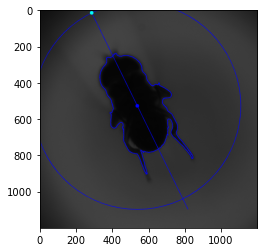

In [4]:
plt.imshow(angle_data['contour_image'])

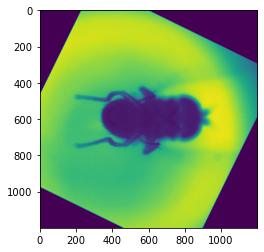

In [5]:
plt.imshow(angle_data['rotated_image'])

In [ ]:
single_image_save('imgs/20240408151332_5837.png',display=True)

In [ ]:
two_image_save_Otsu('imgs/20231121124749_0061.png','imgs/20231121124749_0071.png',"Female at 60s","Female at 71s", display=True)

In [ ]:
two_image_save('imgs/20231121124749_0061.png','imgs/20231121124749_0071.png',"Female at 60s","Female at 71s", display=True)

In [ ]:
two_image_save_Otsu('imgs/20231227131157_0007.png','imgs/20231227125957_0132.png',"Male","Female", display=True)

In [ ]:
two_image_save('imgs/20231227131157_0007.png','imgs/20231227125957_0132.png',"Male","Female",display=True)

Method 1: Comparing to a fixed width with a specified curve based on training data...
- Point by point difference using a fixed width...
- Look for the max on both ends

OTHER:
- 


METHOD: 10 up 10 down for a fly... develop algorithm 
- create the overlayed traces

1. Cut out section of the back that is large
2. interpoate edge of contour and get the curve of the back that is series of point
3. everytime new flip cut out smaller region aroud the contour for the centerline
4. Then we compute the cross correlation between the base case and the two test cases...
    - will then get the maximal product...

    - segments in the front will not fit the shape..


CROSS CORRELATION.... DOt product between points but need to project...

Step 1: Access contour for an image 

height 1200
Angle Test!
Angle Value: -150.81302529857444
My Angle Value: 238.3739494028511
(18, 272)
height 1200
Angle Test!
Angle Value: -150.89635672646585
My Angle Value: 238.2072865470683
mask radius 570
YO
<class 'numpy.ndarray'> (2, 3)
-150.89635672646585 240.89635672646585 330.89635672646585
float64 int32
(2060, 2) (2060, 1)
(2, 3) (2, 2) (2060, 2)
Unrotated
[[  95.60082458 -196.28164035]]

coords
(600.0, 463.2608569282518) (600.0, 520.4071437902093)

Applied
[[558 324]]
(19, 273) old body axis
(2, 2) (1, 2) [[-444]
 [-247]]
[[ 31]
 [787]] new body axis 0
(906, 767) old body axis 1
(2, 2) (1, 2) [[443]
 [247]]
[[894]
 [253]] new body axis 1
ANGLE: -2.6336382541407217 -150.89635672646585
Angle Test!
Angle Value: 90.0058695395041
My Angle Value: 0.011739079008179942
height 1200
Angle Test!
Angle Value: -150.89635672646585
My Angle Value: 238.2072865470683
mask radius 570
<class 'numpy.ndarray'> (2, 3)
-150.89635672646585 240.89635672646585 330.89635672646585
float64 int32
(2060, 2

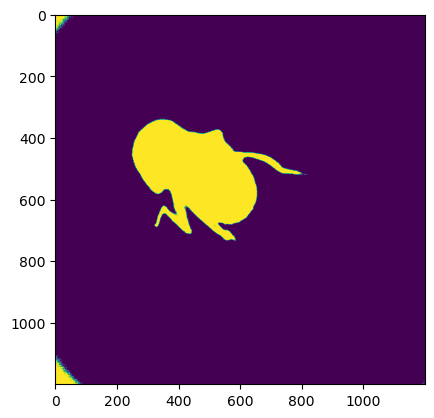

In [5]:
file ="20240415120905_0121"
file_name = "imgs/" + file +".png"
fly_mask, max_contour,centroid, body_axis_pt_0,body_axis_pt_1 = get_contour_centroid(file_name)
fly_mask_adj, max_contour_adj,centroid_adj, body_axis_pt_0_adj,body_axis_pt_1_adj,unrot_vec  = contour_rot_matrix(file_name)
fly_mask_adj2, max_contour_adj2,centroid_adj2, body_axis_pt_0_adj2,body_axis_pt_1_adj2,unrot_vec2 = contour_rot_matrix_shift(file_name)

fly_mask_hrz,max_contour_hrz,centroid_hrz, body_axis_pt_0_hrz,body_axis_pt_1_hrz = contour_hrz_matrix(file_name)

print(max_contour, centroid, body_axis_pt_0, body_axis_pt_1)
plt.imshow(fly_mask)

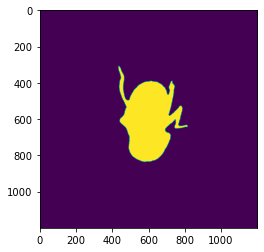

In [3]:
plt.imshow(fly_mask_hrz)

In [5]:
print(body_axis_pt_0)

(1162, 1329)


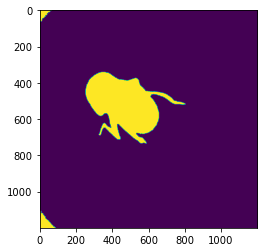

In [10]:
plt.imshow(fly_mask_adj)

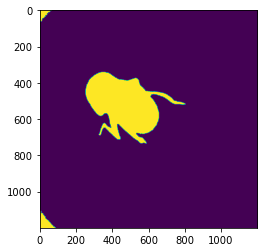

In [8]:
plt.imshow(fly_mask_adj)

In [3]:
unrot_vec

array([[[767, 381]],

       [[766, 381]],

       [[766, 382]],

       ...,

       [[769, 383]],

       [[769, 382]],

       [[768, 382]]])

In [3]:
max_contour

array([[[-130, -408]],

       [[-130, -407]],

       [[-130, -406]],

       ...,

       [[-127, -408]],

       [[-128, -408]],

       [[-129, -408]]], dtype=int32)

#### Step 2: Rotate the image so it is at least centered up down on the y axis

In [ ]:
## Get the Angle of Rotation


In [9]:
x1 = body_axis_pt_0[0]
x2 =body_axis_pt_1[0]
y1 = body_axis_pt_0[1]
y2 =body_axis_pt_1[1]
m = (y2 - y1)/(x2-x1)
print(m)
# y = mx+b
b = y1 - m*x1
print(b)

x = np.linspace(x1,x2+1, num = len(max_contour))
y = m*x + b
print(y)
points = []
for i in range(len(x)):
    points.append((int(x[i]),int(y[i])))
print(points)

0.5579302587176603
261.9572553430821
[272.         272.22499227 272.44998453 ... 768.10794573 768.33293799
 768.55793026]
[(18, 272), (18, 272), (18, 272), (19, 272), (19, 272), (20, 273), (20, 273), (20, 273), (21, 273), (21, 274), (22, 274), (22, 274), (22, 274), (23, 274), (23, 275), (24, 275), (24, 275), (24, 275), (25, 276), (25, 276), (26, 276), (26, 276), (26, 276), (27, 277), (27, 277), (28, 277), (28, 277), (28, 278), (29, 278), (29, 278), (30, 278), (30, 278), (30, 279), (31, 279), (31, 279), (32, 279), (32, 280), (32, 280), (33, 280), (33, 280), (34, 280), (34, 281), (34, 281), (35, 281), (35, 281), (36, 282), (36, 282), (36, 282), (37, 282), (37, 283), (38, 283), (38, 283), (38, 283), (39, 283), (39, 284), (40, 284), (40, 284), (40, 284), (41, 285), (41, 285), (42, 285), (42, 285), (43, 285), (43, 286), (43, 286), (44, 286), (44, 286), (45, 287), (45, 287), (45, 287), (46, 287), (46, 287), (47, 288), (47, 288), (47, 288), (48, 288), (48, 289), (49, 289), (49, 289), (49, 289

In [17]:
len(np.ones((max_contour.shape[0],1)))

3062

In [18]:
print(x2,x1)
print(y2,y1)

178 1162
149 1329


In [19]:
type(body_axis_pt_0)

tuple

In [6]:
print(max_contour.shape, len(max_contour))
print(len(max_contour.reshape(-1,2)))
a = max_contour.reshape(-1,2)
print(a.shape)
print(np.ones((a.shape[0],2)).shape)

(2984, 1, 2) 2984
2984
(2984, 2)
(2984, 2)


In [10]:
import copy
intersect_orig = []
for p in range(len(points)):
    for v in range(len(max_contour)):
        # print(points[p], tuple(max_contour[v][0]))
        if points[p] == tuple(max_contour[v][0]):
            print("True")
            intersect_orig.append((p,v))
print(intersect_orig)
intersect = copy.deepcopy(intersect_orig)
for val in range(1, len(intersect_orig)):
    if np.abs(intersect_orig[val][0] - intersect_orig[val-1][0]) < 20:
        # if the difference is less than 20 then drop the second one
        intersect.remove(intersect_orig[val])
        print(intersect, intersect_orig)
print(intersect)

True
True
True
True
[(675, 218), (676, 218), (1745, 1628), (1746, 1628)]
[(675, 218), (1745, 1628), (1746, 1628)] [(675, 218), (676, 218), (1745, 1628), (1746, 1628)]
[(675, 218), (1745, 1628)] [(675, 218), (676, 218), (1745, 1628), (1746, 1628)]
[(675, 218), (1745, 1628)]


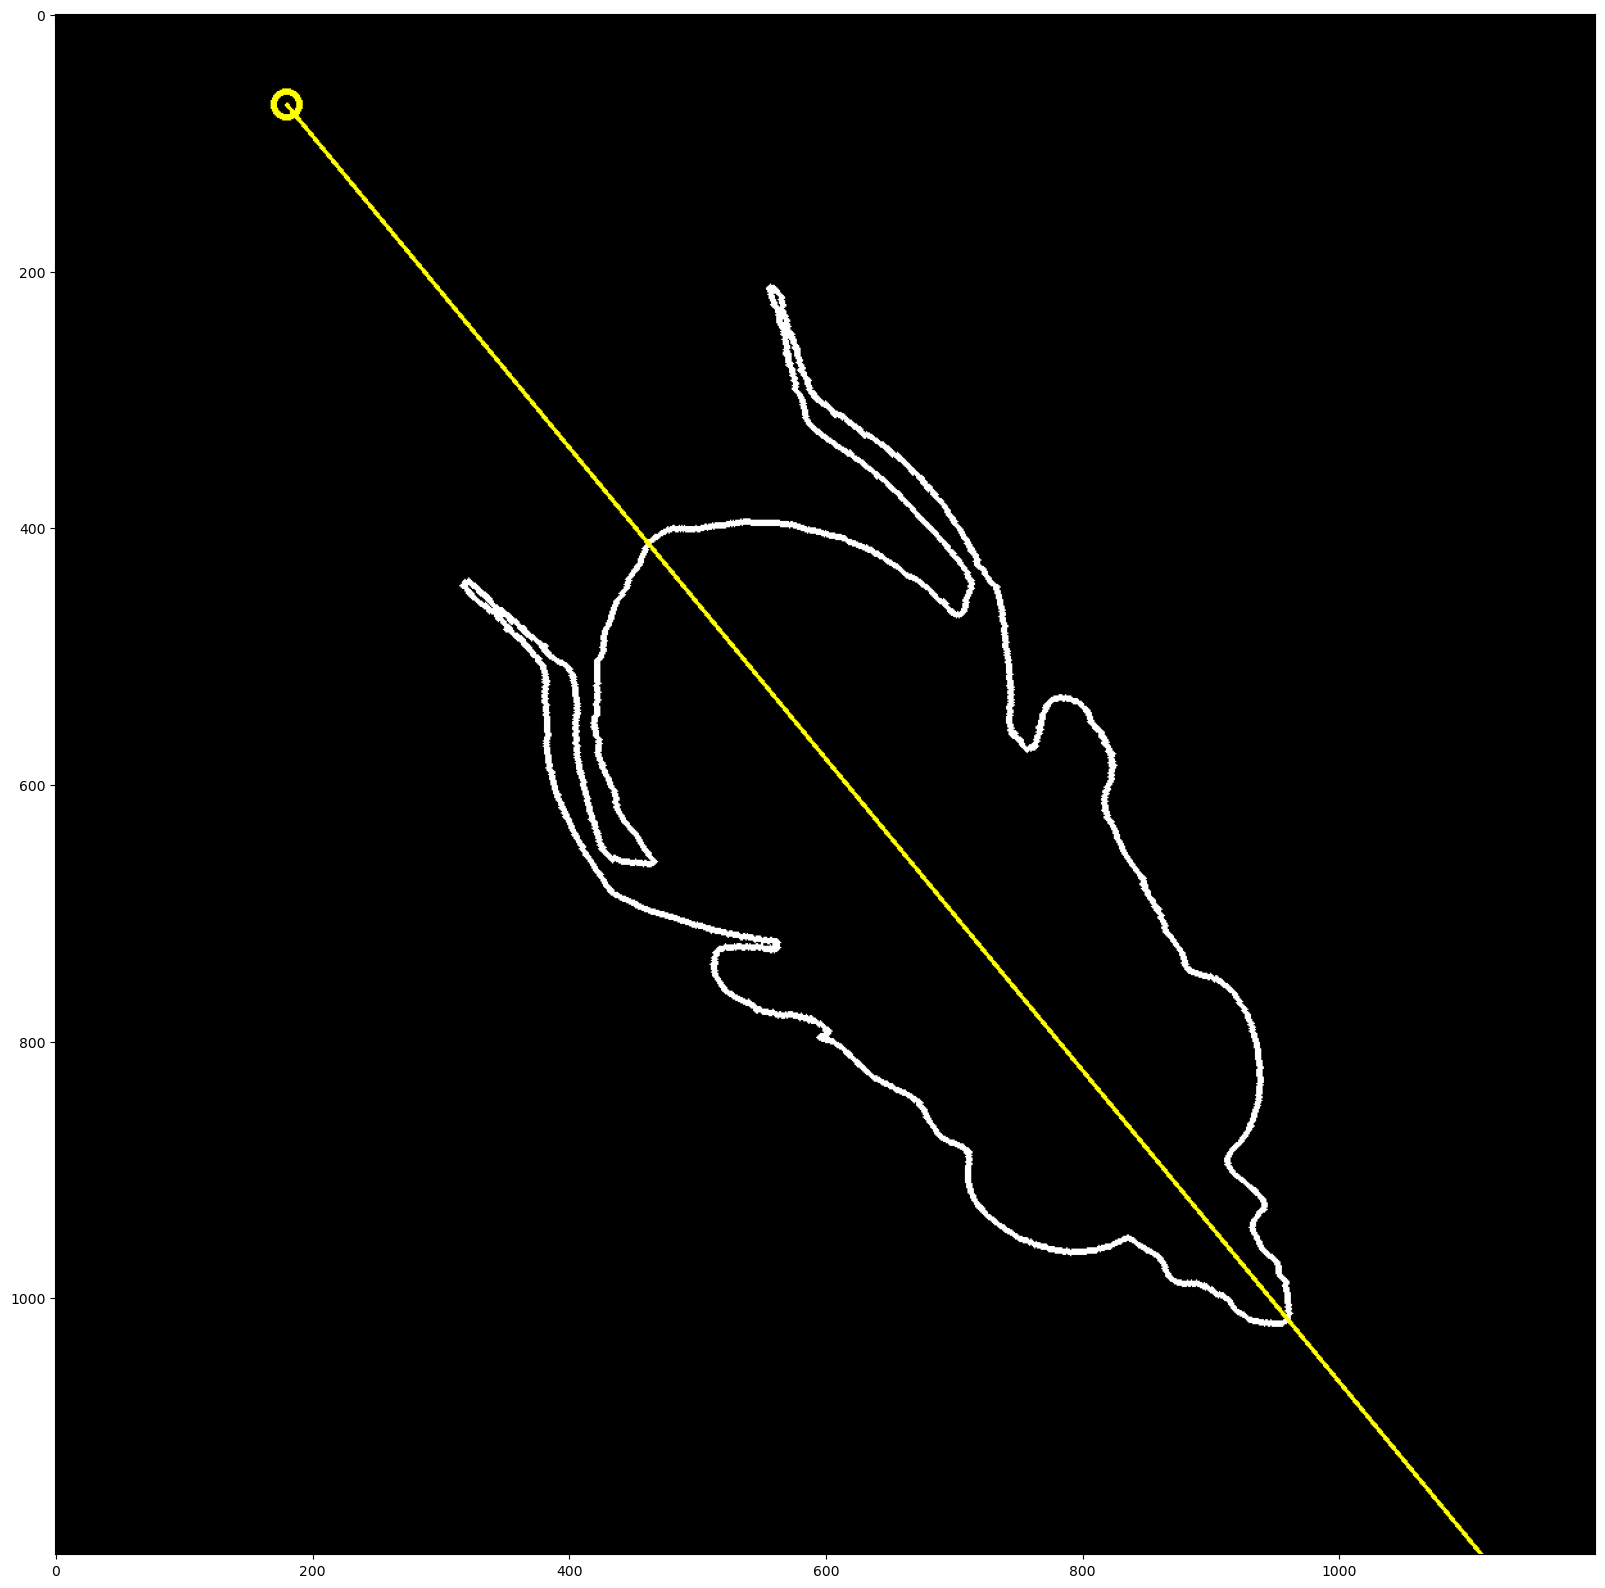

In [128]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask,max_contour)

cv2.circle(mask_fly,(body_axis_pt_0),10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,(body_axis_pt_1),10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0,body_axis_pt_1,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)

# cv2.circle(mask_fly,(max_contour[intersect[0][1]][0]),10, color = (0,255,255),thickness =3 )

# cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
plt.imshow(mask_fly)

In [6]:
tuple(body_axis_pt_0_adj.reshape(1,2)[0])

(1425, 738)

In [4]:
tuple(body_axis_pt_1_adj.reshape(1,2)[0])

(-83, 738)

## Method 2a: Working Version - Analysis of Image
- This method allows for an analysis of the image and defining various lines for the purpose of visualizing the differences in the fly shape
- This method may be used in the future in constructing lighter weight detectors....

What is being performed:
- Generates the midline
- Creates buffer line
- and parallel lines on the buffer with respect to the midline
- finds the intersection points of the parallel lines on the buffer to the contour...
- Finds the range of points in the contour
- Has an undefined line representing centerline that is in line with the y-axis
- able to access the contours and ext.

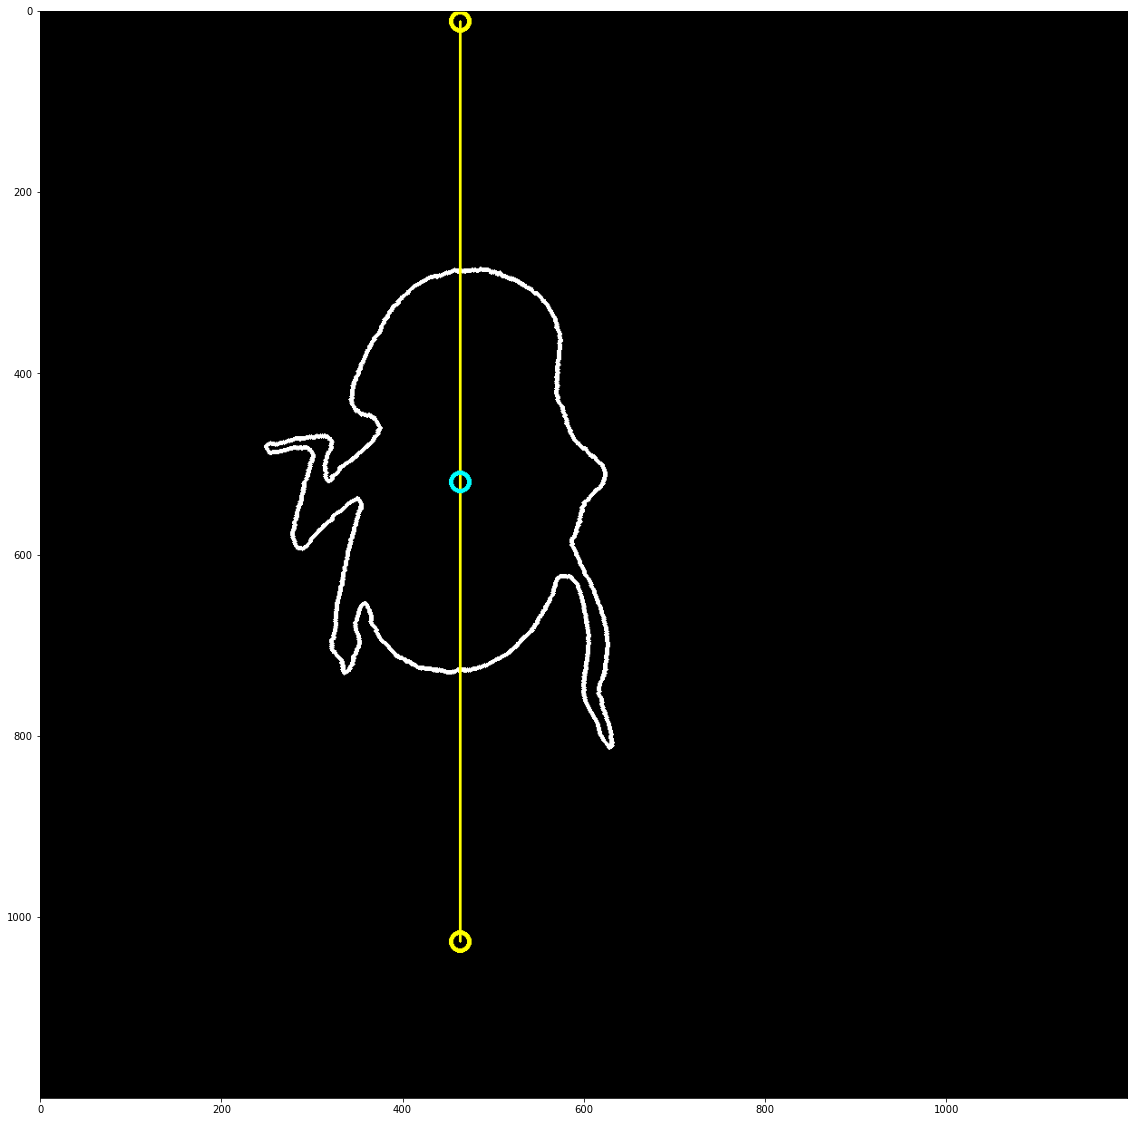

In [6]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask_adj,unrot_vec)

cv2.circle(mask_fly,body_axis_pt_0_adj,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,body_axis_pt_1_adj,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0_adj,body_axis_pt_1_adj,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)

# cv2.circle(mask_fly,(max_contour[intersect[0][1]]),10, color = (0,255,255),thickness =3 )

# cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
cv2.circle(mask_fly,centroid_adj,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly)

### Draw the Buffer Line

- [`X`] Draw a line of fixed width X across the centroid 

- [   ] Using this line also draw lines that are parallel to the centerline up and down

- [   ] Then plot the points at which it intersects on the fly

- [   ] After this point We will be able to get contour sections from top and bottom. 

- [   ] These will then be plotted in two different orientations.

- [   ] In this method after we have plotted in two different orientations then the user will deciede which is top and which is bottom. In the future we will utilize.


#### Checked if the centerline is undefined

In [11]:
x1 = body_axis_pt_0_adj[0]
x2 = body_axis_pt_1_adj[0]
y1 = body_axis_pt_0_adj[1]
y2 =body_axis_pt_1_adj[1]

print(x1,x2)
if (x2-x1 ) == 0:
    print("undefined")
elif (y2-y1) == 0 :
    print(f"Horizontal line at y = {y1}")
else:
    print(x2-x1)
    print(y2-y1)
    m = (y2 - y1)/(x2-x1)
    print(m)
    print(f"centroid {centroid_adj}")

463 463
undefined


#### 1. Draw Line of Fixed width across centroid

Fixed Width will start with 100px


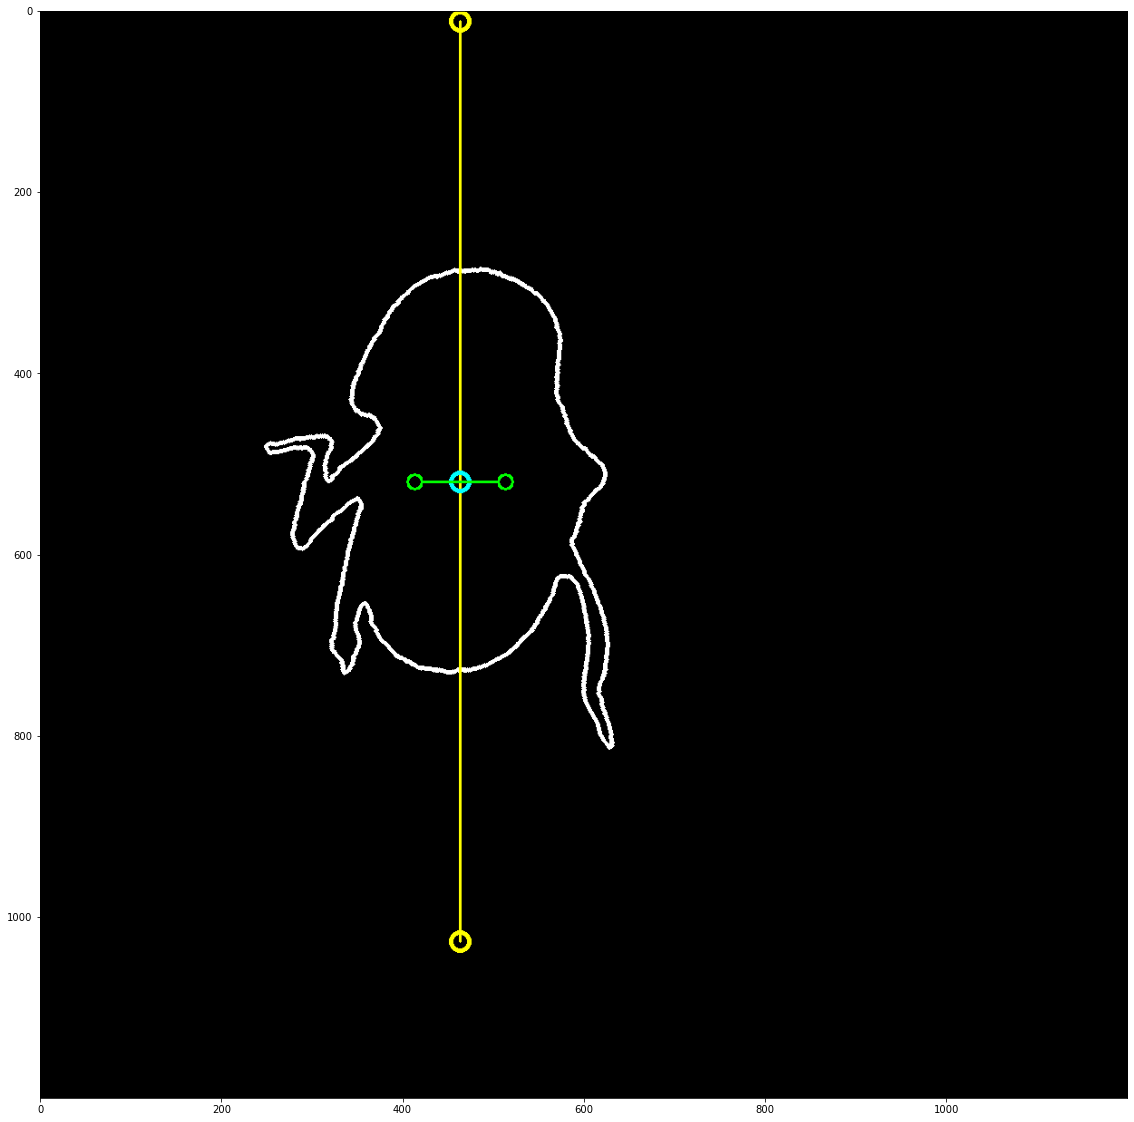

In [12]:
plt.figure(figsize=(20,20))
mask_fly1 = copy.deepcopy(mask_fly)
## Point 1: 50 points to right
p1 = (centroid_adj[0] + 50, centroid_adj[1])
## Point 2: 50 points to left
p2 = (centroid_adj[0] - 50,centroid_adj[1])
cv2.circle(mask_fly1,p1,8, color = (0,255,0),thickness =2)
cv2.circle(mask_fly1,p2,8, color = (0,255,0),thickness =2)
# cv2.circle(mask_fly1,(800,500),8,color = (0,255,255),thickness =2) # test
cv2.line(mask_fly1,(p1[0]-8,p1[1]),(p2[0]+8,p2[1]),color = (0,255,0), thickness = 2)
plt.imshow(mask_fly1)

#### 2. Draw Parallel Lines From p1 and p2 until intersection with top and bottom of object contour

In [13]:
## 
def parallel_lines(point1,point2,centroid,body_axis_pt_0,body_axis_pt_1,max_contour,width = 50):
    """
    Using two points and centroid determine two lines that are parallel 
    to the centroid's centerline. Returns a tuple of two arrays describing the parallel
    lines.

    Parameters:
    -----------
    point1 : tuple
        describes the x,y pixel location of a point located 50px to right of centroid
    point2 : tuple
        describes the x,y pixel location of a point located 50px to the left of centroid
    
    Returns:
    --------
    par1 : array
        array of points for parallel line interesecting point 1
    par2 : array
        array of points for parallel line intersecting point 2
    """
    # get the range of points needed
    len_list = len(max_contour)

    # point 1: left of centroid
    ## y1 and y2 for point 1 ... X width from body_axis_pt_0
    print(body_axis_pt_0[0])
    point1_y1 = body_axis_pt_0[1] 
    point1_y2 = body_axis_pt_1[1] 
    
    # Point 2: right of centroid 
    ## y1 and y2 for point 2 ... X width to the right of the centroid
    point2_y1 = body_axis_pt_0[1]
    point2_y2 = body_axis_pt_1[1] 

    # Point 1 and Point 2 - y values
    ## X values for these points will remain the same
    point1_x_u = np.full(1200,p1[0])
    point1_x_d = np.full(1200,p1[0])
    point2_x_u= np.full(1200,p2[0])
    point2_x_d= np.full(1200,p2[0])

    # get the array for point 1
    
    yvalu1 = np.linspace(min([point1_y1,point1_y2,0]),centroid[1]+1,num = 1200)
    up1 = np.column_stack((point1_x_u,yvalu1)).astype(int)
    yvald1 = np.linspace(centroid[1],max(point1_y1,point1_y2)+1,num = 1200)
    down1 = np.column_stack((point1_x_d,yvald1)).astype(int)
    # arr_1 = np.concatenate(a1,b1)
    # get the array for point 2
    yvalu2 = np.linspace(min([point2_y1,point2_y2,0]),centroid[1]+1,num = 1200)
    up2 = np.column_stack((point2_x_u,yvalu2)).astype(int)
    yvald2 = np.linspace(centroid[1],max(point2_y1,point2_y2)+1,num =1200)
    down2= np.column_stack((point2_x_d,yvald2)).astype(int)
    # arr_2 = np.concatenate(a2,b2)

    return  yvalu1, up1,down1,up2,down2

def intersect_up(arr_min,max_contour):
    """
    Takes array ordered from min y value

    Returns:
    -------
    inter_up : list
        list of the point or points where the max contour intersections with the array...
    """
    ## Starts from end of array aka centroid and goes in looking at intersections...
    ### This is to avoid any initial intersections at the start..
    inter_up = [ ]
    ## Reverse the array
    arr_min = arr_min[::-1] # so will go from the centroid now until the end
    for p in range(len(arr_min)):
        for v in range(len(max_contour)):
            # print(arr_min[p], tuple(max_contour[v][0])[1])
            # print(tuple(arr_min[p]),tuple(max_contour[v][0]))

            if tuple(arr_min[p]) == tuple(max_contour[v][0]):
                # print("True")
                inter_up.append((p,v))

    # for p in range(len(points)):
    #     for v in range(len(max_contour)):
    #         # print(points[p], tuple(max_contour[v][0]))
    #         if points[p] == tuple(max_contour[v][0]):
    #             print("True")
    #             intersect_orig.append((p,v))
    # print(inter_up)
    intersect = copy.deepcopy(inter_up)
    for val in range(1, len(inter_up)):
        if np.abs(inter_up[val][1] - inter_up[val-1][1]) < 20:
            # if the difference is less than 20 then drop the second one
            intersect.remove(inter_up[val])
            print(intersect, inter_up)
    # print(intersect)
    print("point from array")
    print(arr_min[intersect[0][0]])
    print("point from contour:")
    print(max_contour[0][0][1])
    ## Return the point to plot from array...should be same regardless just need the coordinates...
    return arr_min[intersect[0][0]]
    ## check on if captured two intersections at same location..
    ### gets rid of second one
def intersect_down(arr_max, max_contour):
    """
    Takes array ordered from centroid to max...

    Returns:
    -------
    inter_up : list
        list of the point or points where the max contour intersections with the array...
    """
    ## Starts from end of array aka centroid and goes in looking at intersections...
    ### This is to avoid any initial intersections at the start..
    inter_up = [ ]
    ## Reverse the array
    for p in range(len(arr_max)):
        for v in range(len(max_contour)):
            # print(arr_min[p], tuple(max_contour[v][0])[1])
            # print(tuple(arr_min[p]),tuple(max_contour[v][0]))

            if tuple(arr_max[p]) == tuple(max_contour[v][0]):
                # print("True")
                inter_up.append((p,v))

    # for p in range(len(points)):
    #     for v in range(len(max_contour)):
    #         # print(points[p], tuple(max_contour[v][0]))
    #         if points[p] == tuple(max_contour[v][0]):
    #             print("True")
    #             intersect_orig.append((p,v))
    # print(inter_up)
    intersect = copy.deepcopy(inter_up)
    for val in range(1, len(inter_up)):
        if np.abs(inter_up[val][1] - inter_up[val-1][1]) < 20:
            # if the difference is less than 20 then drop the second one
            intersect.remove(inter_up[val])
            print(intersect, inter_up)
    # print(intersect)
    print("point from array")
    print(arr_max[intersect[0][0]])
    print("point from contour:")
    print(max_contour[0][0][1])
    ## Return the point to plot from array...should be same regardless just need the coordinates...
    return arr_max[intersect[0][0]]
     

def find_intersection(arr1,arr2,maxcontour):
    """
    With two arrays of points compare with the points of the contour to detemrine the locations of intersection

    First find intersections going in opposite direction...

    Then find intersections going

    """
    intersect_up = []


    intersect_down = []
    pass
yvalu1, up1,down1,up2,down2 = parallel_lines(p1,p2,centroid_adj,body_axis_pt_0_adj,body_axis_pt_1_adj,unrot_vec)
# print(up1[::-1])
# print(up1)
inter_up_pnt1 = intersect_up(up1,unrot_vec)
inter_down_pnt1 = intersect_down(down1, unrot_vec)

# print(up2)
inter_up_pnt2 = intersect_up(up2,unrot_vec)

inter_down_pnt2 = intersect_down(down2,unrot_vec)

# xvals = [unrot_vec[i][0][0] for i in range(len(unrot_vec))]
# print(xvals)

# a = np.where(np.array(xvals) == 624)



    
    


463
[(521, 51), (523, 52), (524, 52)] [(521, 51), (522, 51), (523, 52), (524, 52)]
[(521, 51), (524, 52)] [(521, 51), (522, 51), (523, 52), (524, 52)]
[(521, 51)] [(521, 51), (522, 51), (523, 52), (524, 52)]
point from array
[513 294]
point from contour:
324
[(451, 1238), (453, 1238)] [(451, 1238), (452, 1238), (453, 1238)]
[(451, 1238)] [(451, 1238), (452, 1238), (453, 1238)]
point from array
[513 711]
point from contour:
324
[(498, 156)] [(498, 156), (499, 156)]
point from array
[413 304]
point from contour:
324
[(477, 1139), (479, 1139)] [(477, 1139), (478, 1139), (479, 1139)]
[(477, 1139)] [(477, 1139), (478, 1139), (479, 1139)]
point from array
[413 722]
point from contour:
324


In [9]:
# take the 30 contour points to the lefts and right of the two intersections and plot
# adj_intersect = [(intersect[0][1]+50,intersect[0][1]-50),(intersect[1][1]+50,intersect[1][1]-50)]
print(adj_intersect)

NameError: name 'intersect' is not defined

In [69]:
max_contour_adj[0][0]

array([-116, -454], dtype=int32)

0

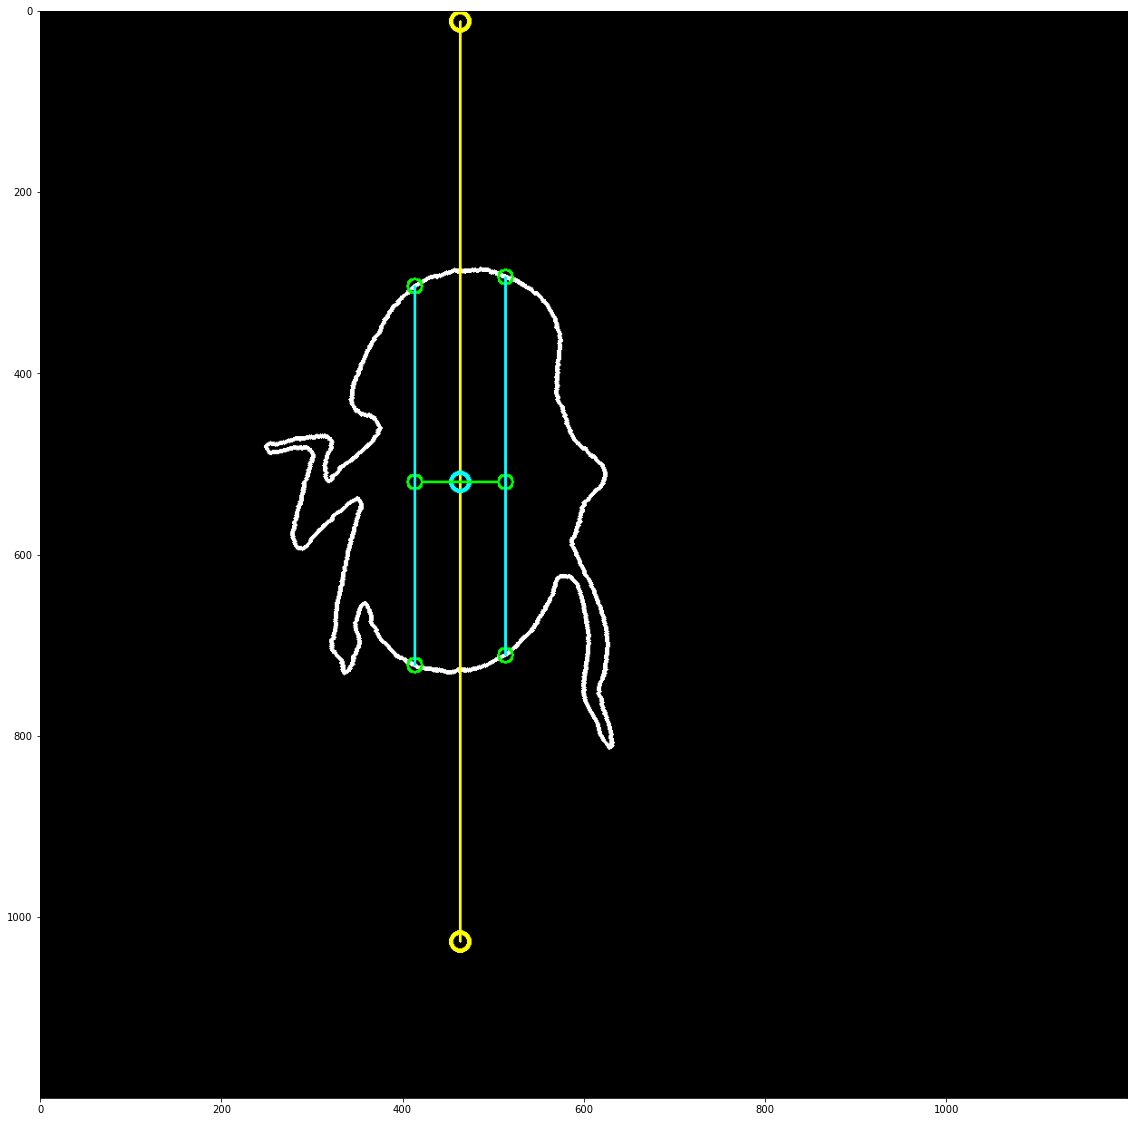

In [14]:
plt.figure(figsize=(20,20))
mask_fly2 = copy.deepcopy(mask_fly1)
# Point 1 lines
cv2.circle(mask_fly2,tuple(inter_up_pnt1),8, color = (0,255,0),thickness =2)
cv2.circle(mask_fly2,tuple(inter_down_pnt1),8, color = (0,255,0),thickness =2)
cv2.line(mask_fly2,tuple(inter_up_pnt1),tuple(inter_down_pnt1),color = (0,255,255), thickness = 2)
# Point 2 Lines
cv2.circle(mask_fly2,tuple(inter_up_pnt2),8, color = (0,255,0),thickness =2)
cv2.circle(mask_fly2,tuple(inter_down_pnt2),8, color = (0,255,0),thickness =2)
# cv2.circle(mask_fly2,unrot_vec[490][0],8, color = (0,255,0),thickness =2)
# cv2.circle(mask_fly2,unrot_vec[2146][0],8, color = (0,255,0),thickness =2)
cv2.line(mask_fly2,inter_up_pnt2,tuple(inter_down_pnt2),color = (0,255,255), thickness = 2)

plt.imshow(mask_fly2)




In [8]:
li = ["y","n","y","y","y","n","n"]
li.count("y")

4

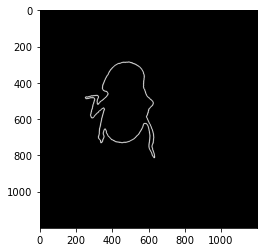

In [15]:
mask_fly = get_objectmask(fly_mask_adj,unrot_vec)
plt.imshow(mask_fly)

# Method 3: Mean Mask Method
- First label images front and back
Then what we will do and then we can see if they face the front
- First orient all the images so they face the front...
- Second we will take the mean mask and ensure that it is oriented in the center so all masks need to be centered in the image
-

Will then use the average/mean mask as a template. With this template we should be able to compare to the original images and then determine the orientation.

Then will examine effectivness on test dataset..


### Generate a test image of fly flipped horizontally
The reason for doing this is to ensure that the fly is centered within the image

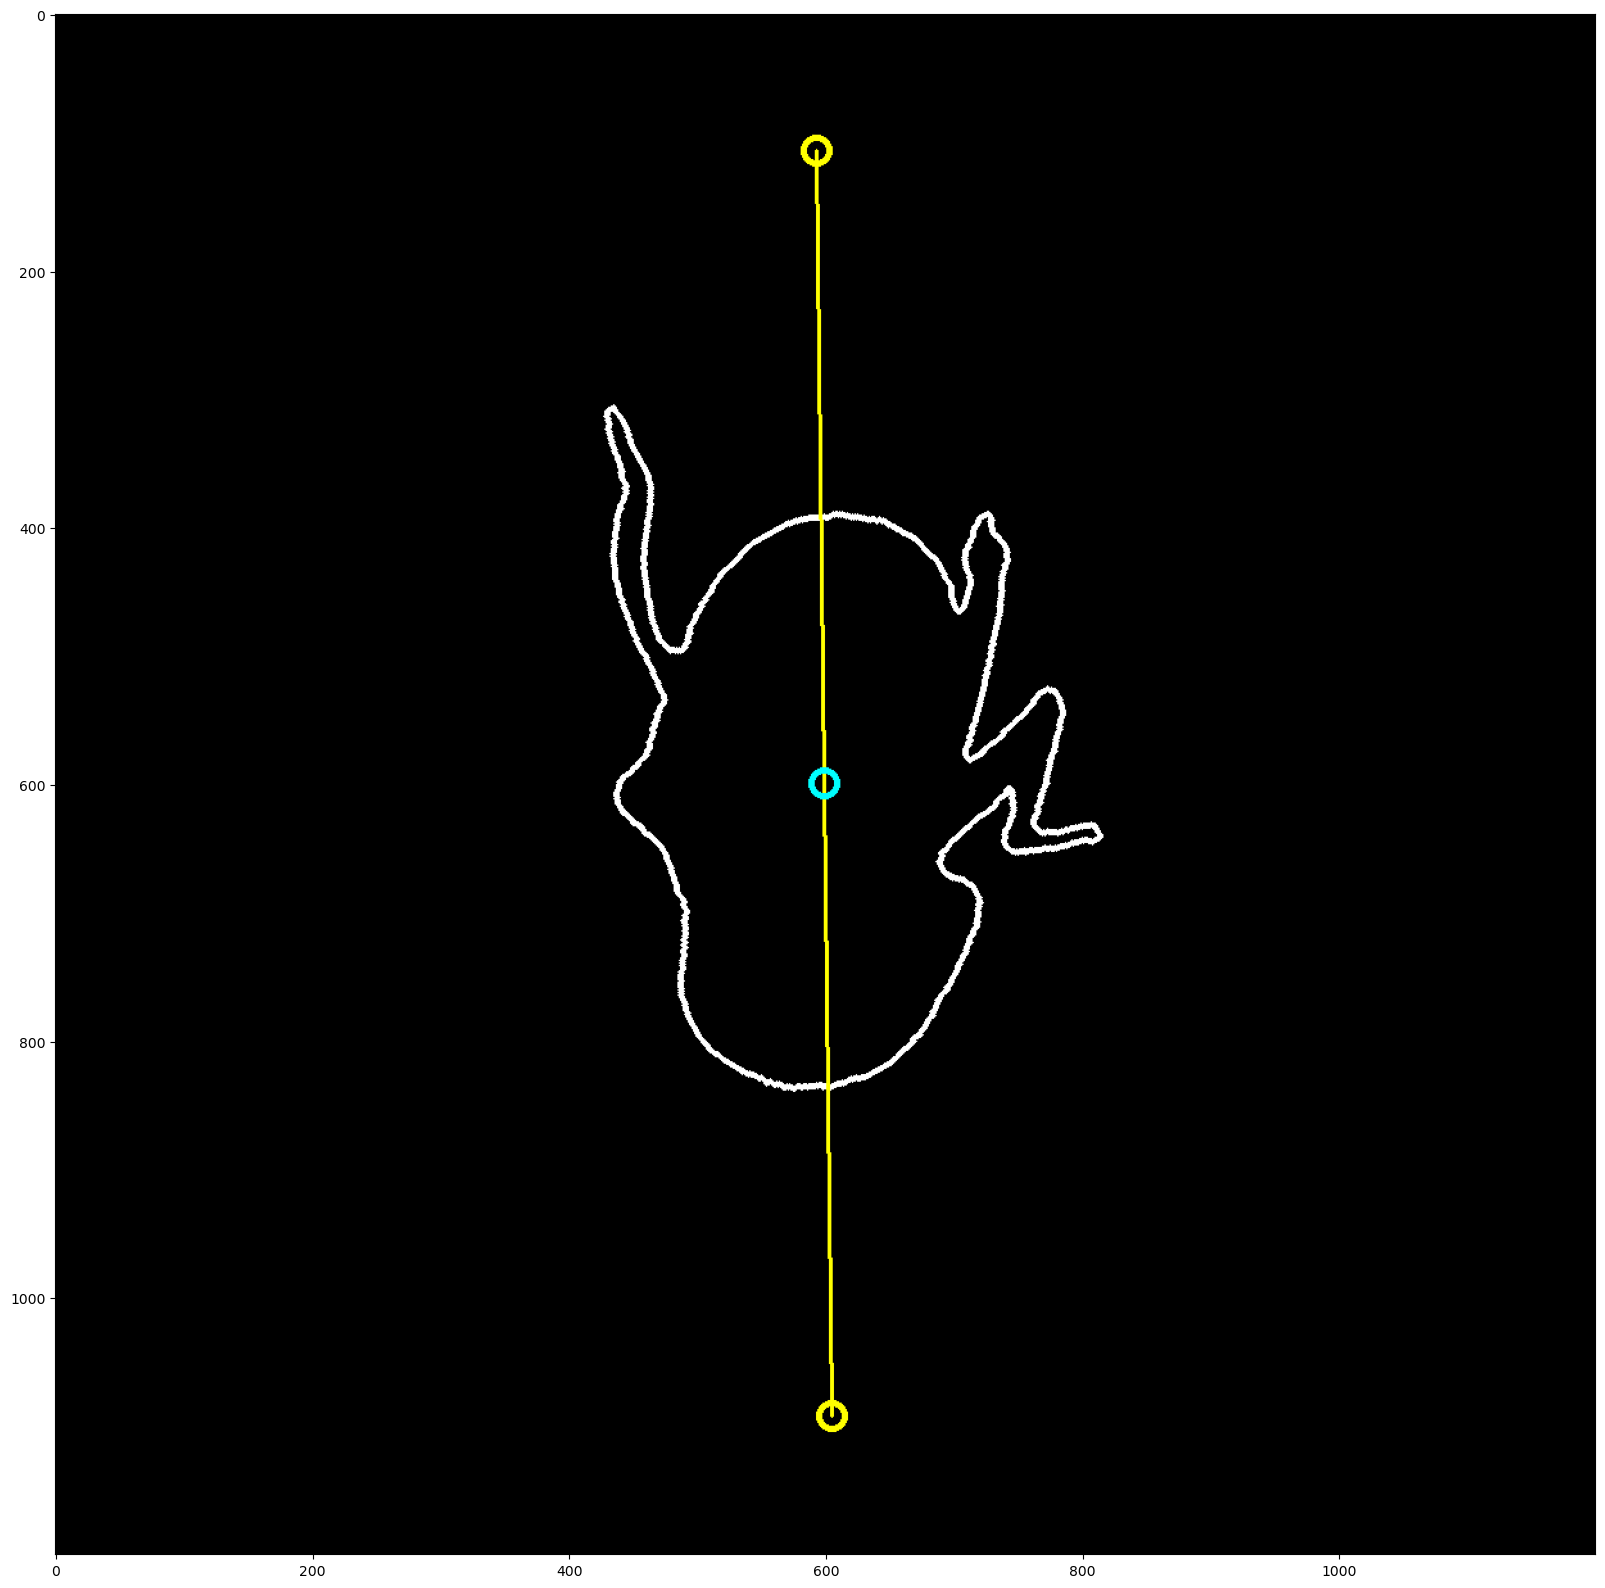

In [6]:

plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask_hrz,max_contour_hrz)

cv2.circle(mask_fly,body_axis_pt_0_hrz,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,body_axis_pt_1_hrz,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0_hrz,body_axis_pt_1_hrz,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)

# cv2.circle(mask_fly,(max_contour[intersect[0][1]]),10, color = (0,255,255),thickness =3 )

# cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
cv2.circle(mask_fly,centroid_hrz,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly)

### Method for generating the labels for the images

['C:/Users/lkrow/Desktop/20240502125110\\20240502125110_6321.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_1843.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_3776.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_7251.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_6914.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_5384.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_5998.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_4314.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_5295.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_4567.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_0524.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_6582.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_3199.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_2546.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_6797.png', 'C:/Users

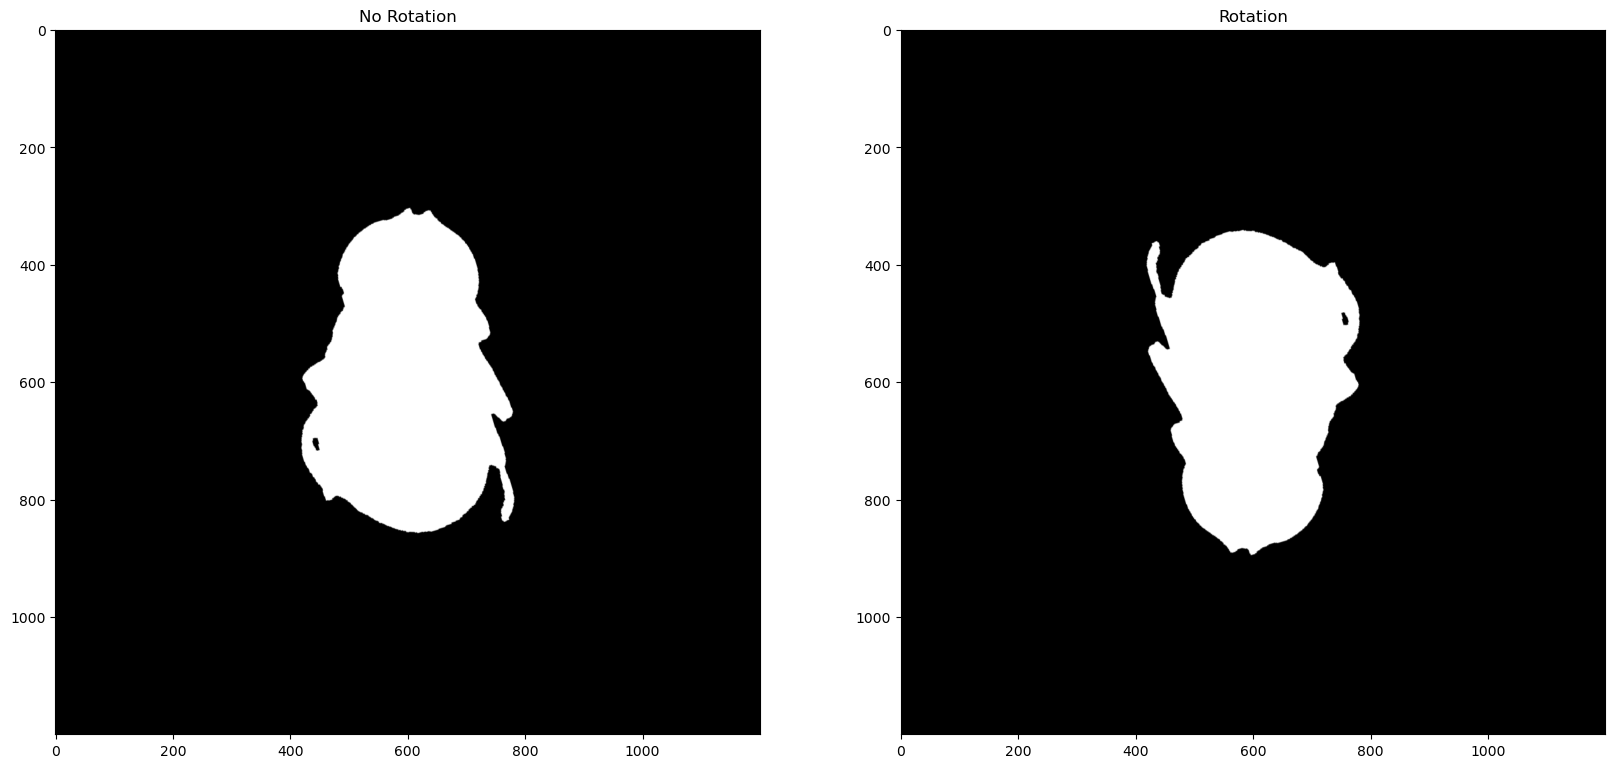

height 1200
Angle Test!
Angle Value: -157.07408253028188
My Angle Value: 225.8518349394363
mask radius 570
Angle Test!
Angle Value: 89.83142752994877
My Angle Value: 359.66285505989754


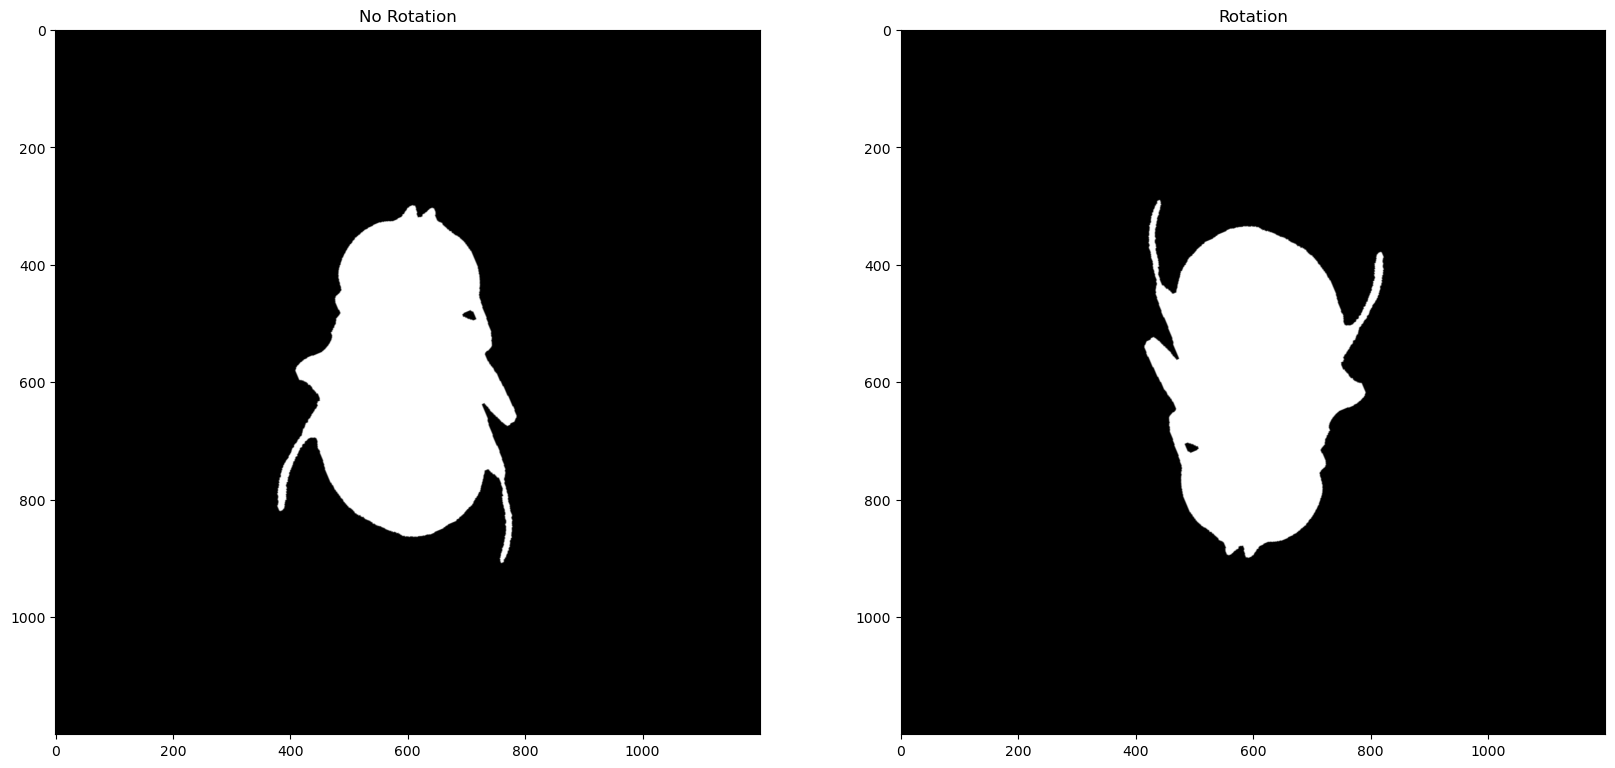

height 1200
Angle Test!
Angle Value: 106.01569494185847
My Angle Value: 32.03138988371697
mask radius 570
Angle Test!
Angle Value: 90.57008731534444
My Angle Value: 1.140174630688847


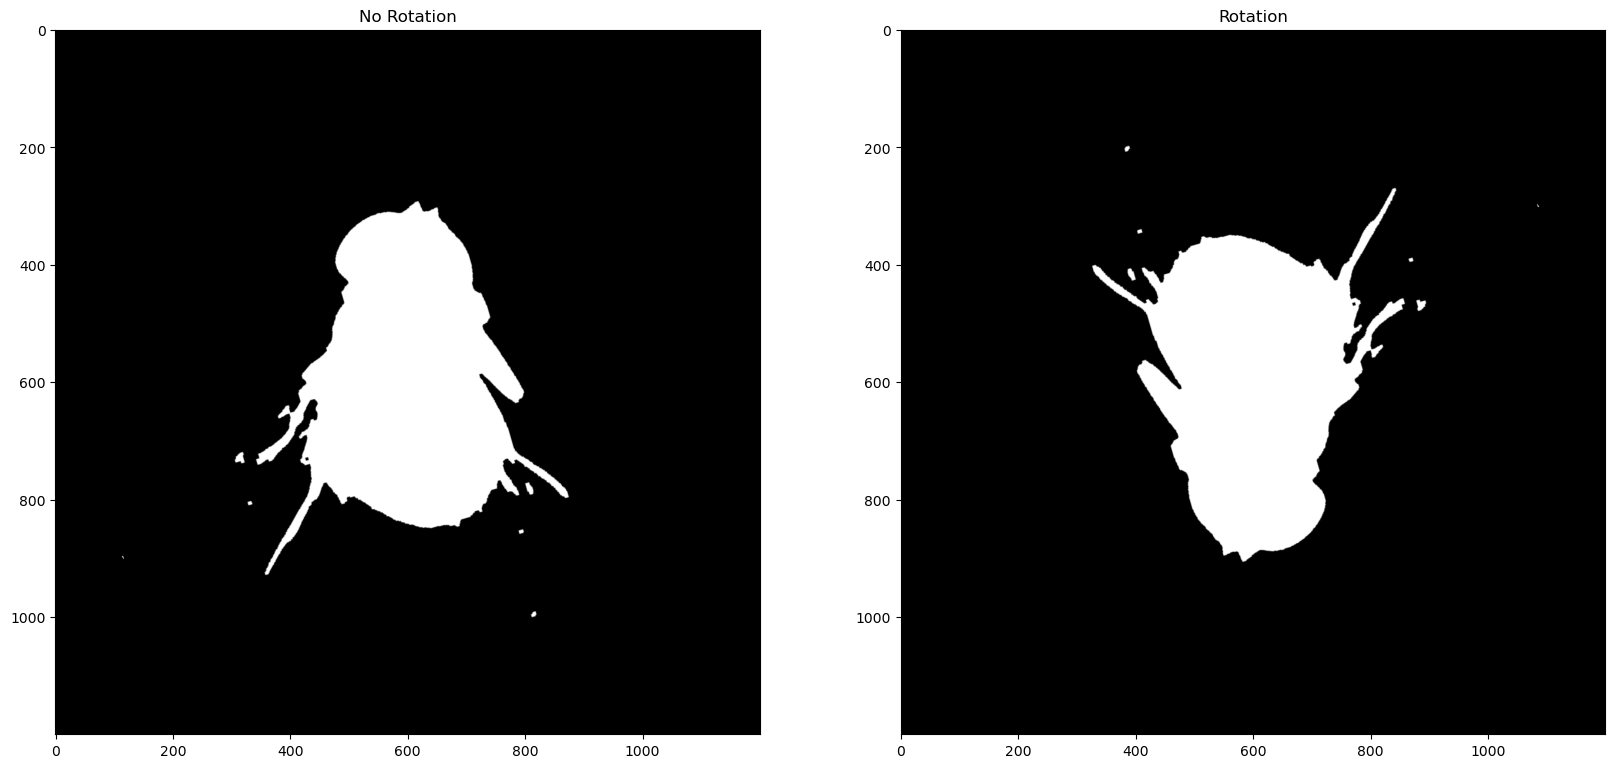

height 1200
Angle Test!
Angle Value: 73.29344461994063
My Angle Value: 326.58688923988126
mask radius 570
Angle Test!
Angle Value: 89.96041844164914
My Angle Value: 359.9208368832983


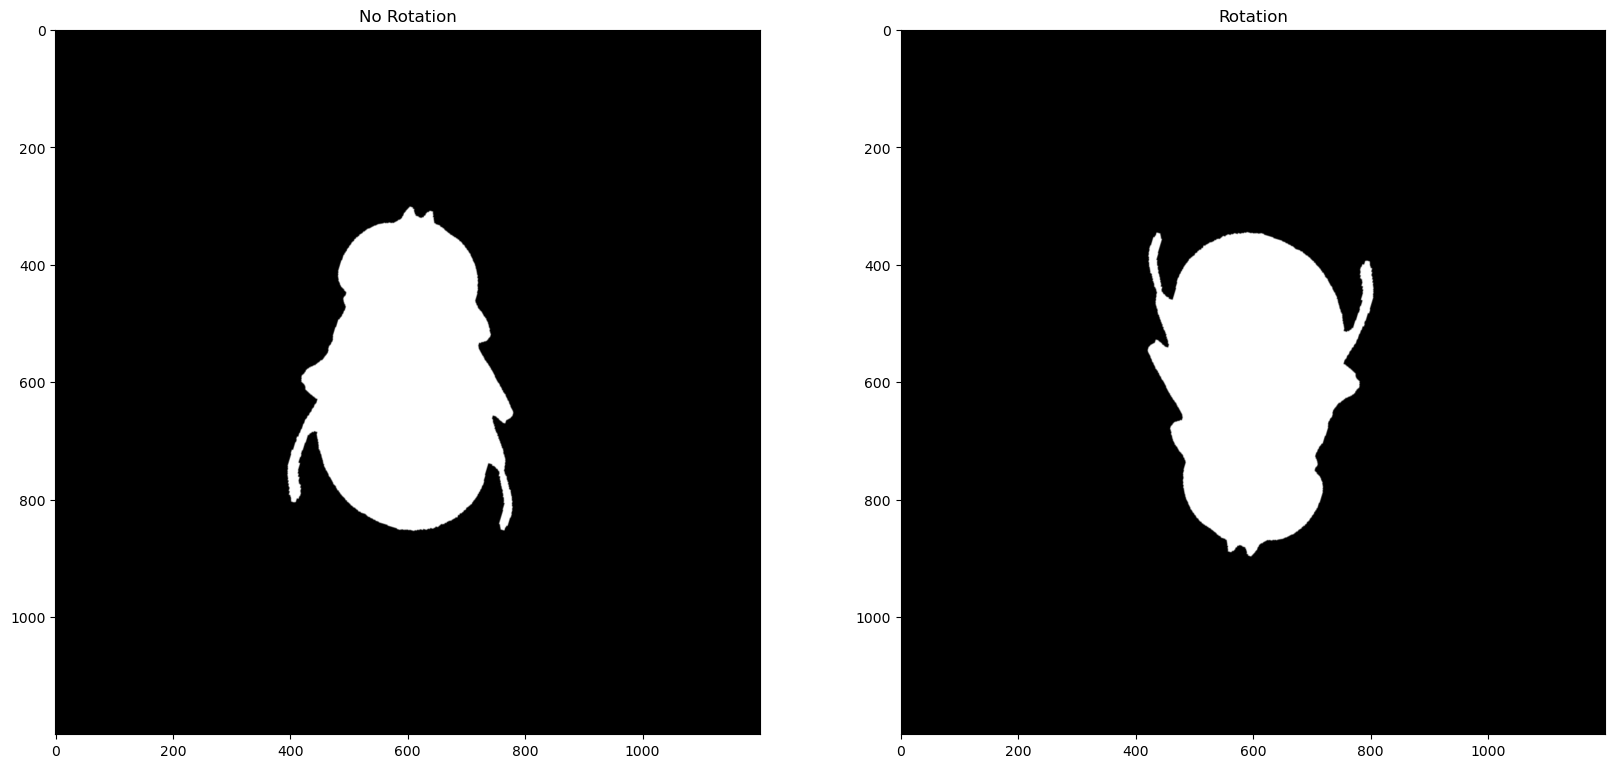

height 1200
Angle Test!
Angle Value: 47.776717181798645
My Angle Value: 275.5534343635973
mask radius 570
Angle Test!
Angle Value: 90.06121380333141
My Angle Value: 0.1224276066627965


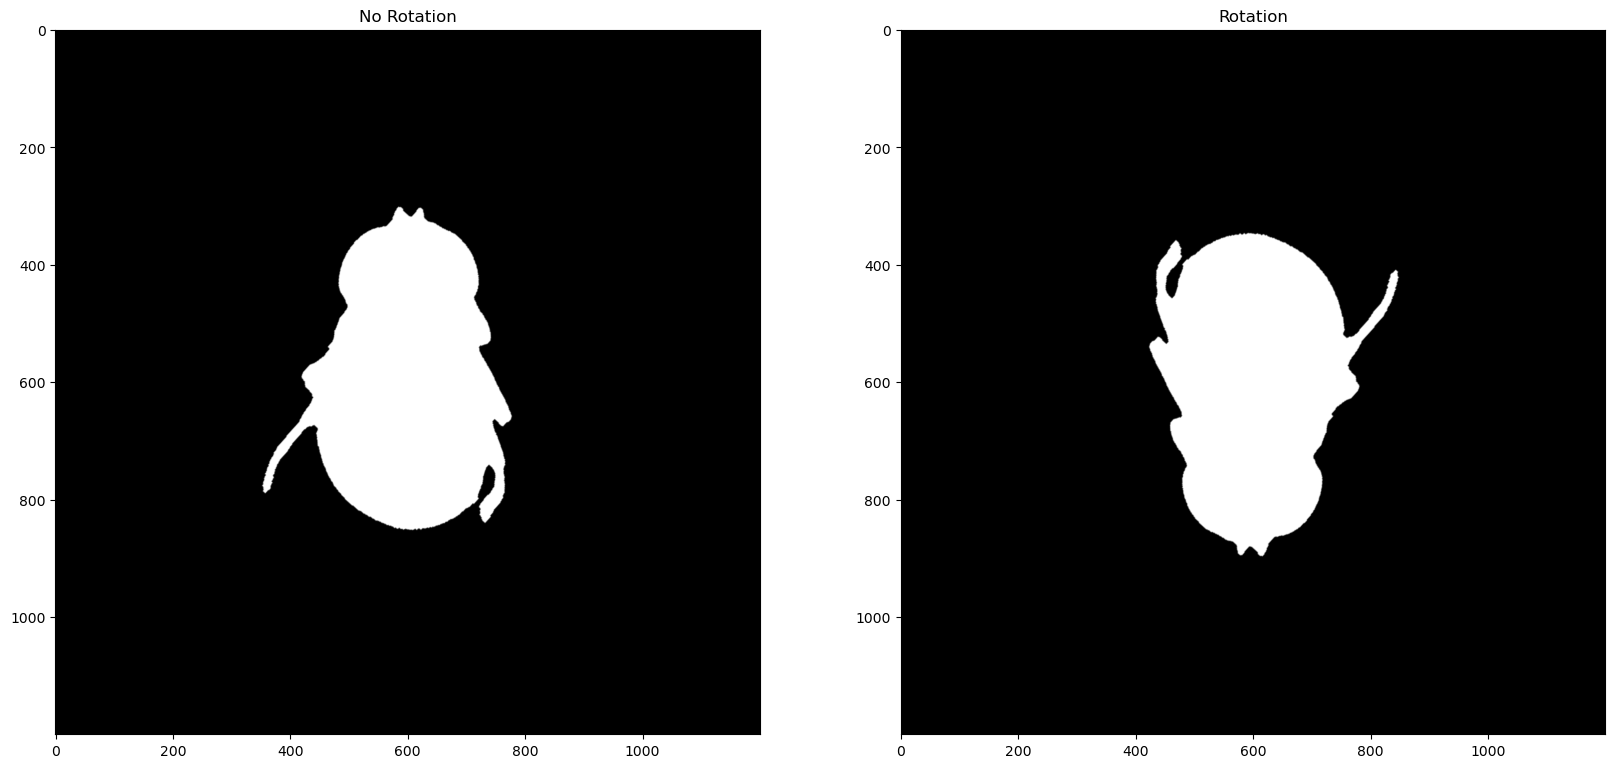

height 1200
Angle Test!
Angle Value: 148.1603175802068
My Angle Value: 116.32063516041356
mask radius 570
Angle Test!
Angle Value: 90.17423056211238
My Angle Value: 0.3484611242247695


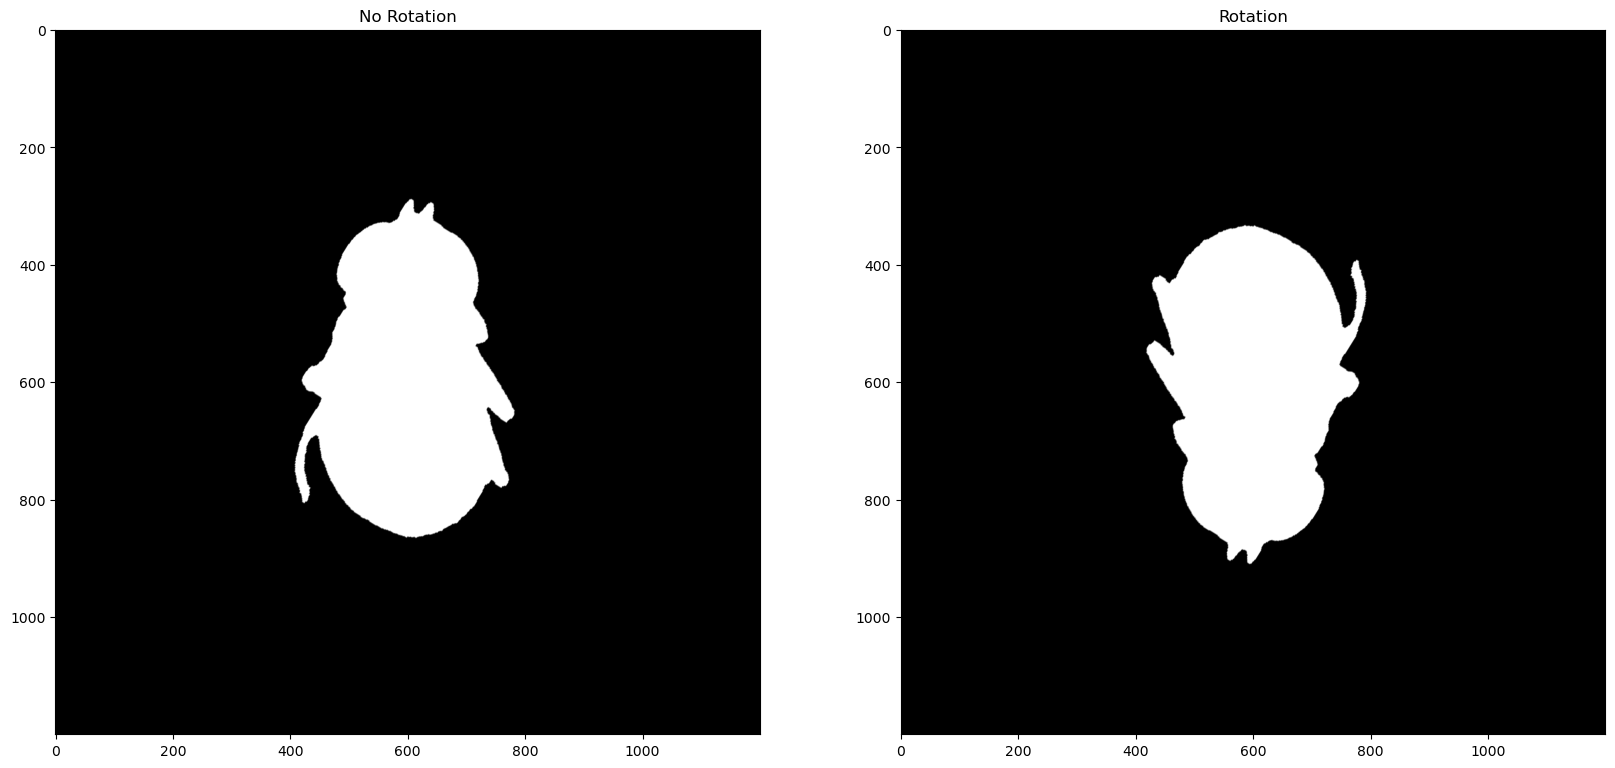

height 1200
Angle Test!
Angle Value: 146.56167101242883
My Angle Value: 113.12334202485762
mask radius 570
Angle Test!
Angle Value: 90.18346526062922
My Angle Value: 0.36693052125843906


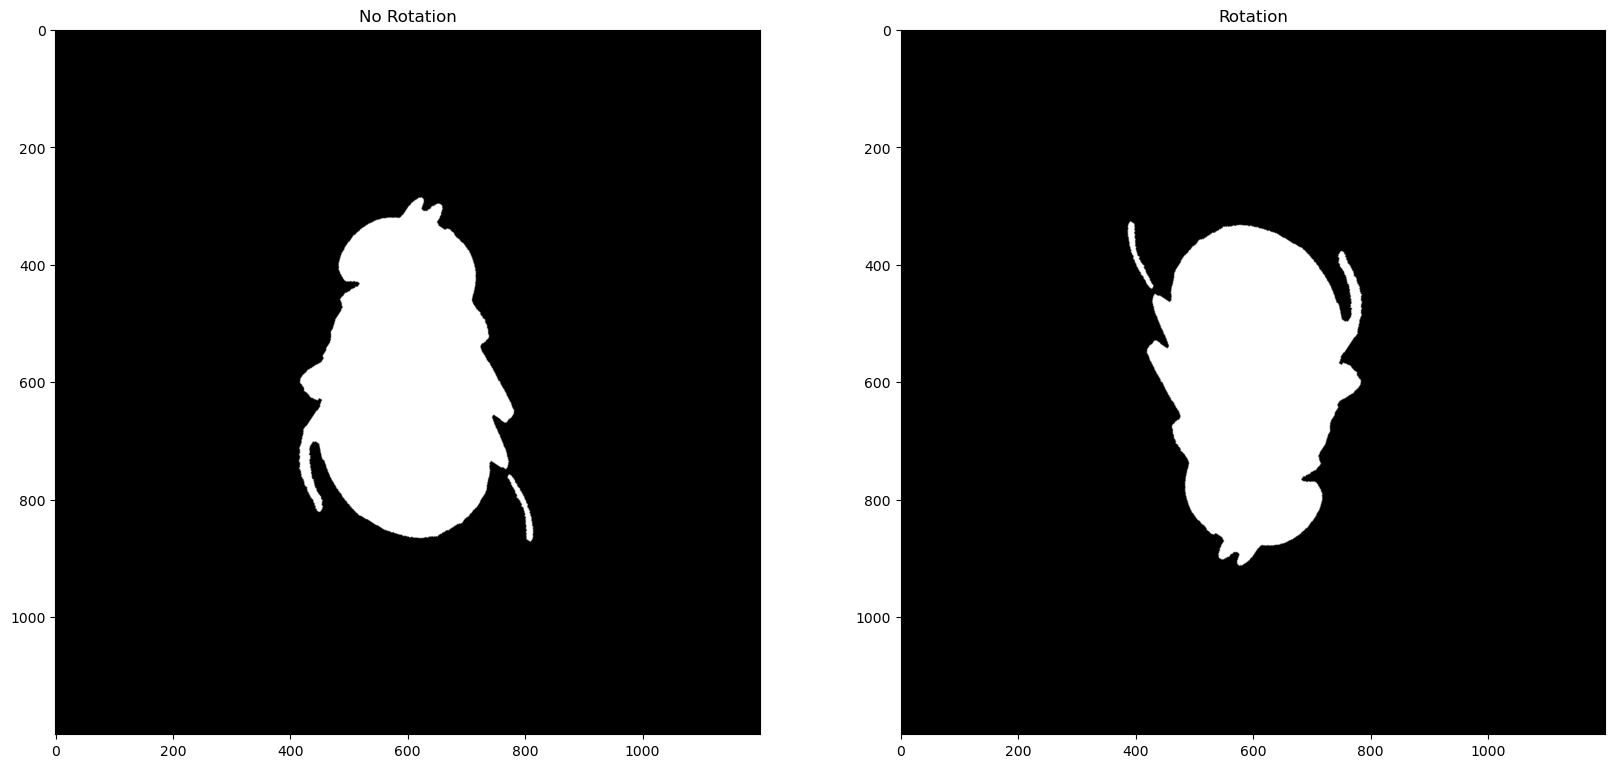

height 1200
Angle Test!
Angle Value: 117.3295471915344
My Angle Value: 54.659094383068776
mask radius 570
Angle Test!
Angle Value: 90.1039771273037
My Angle Value: 0.20795425460735828


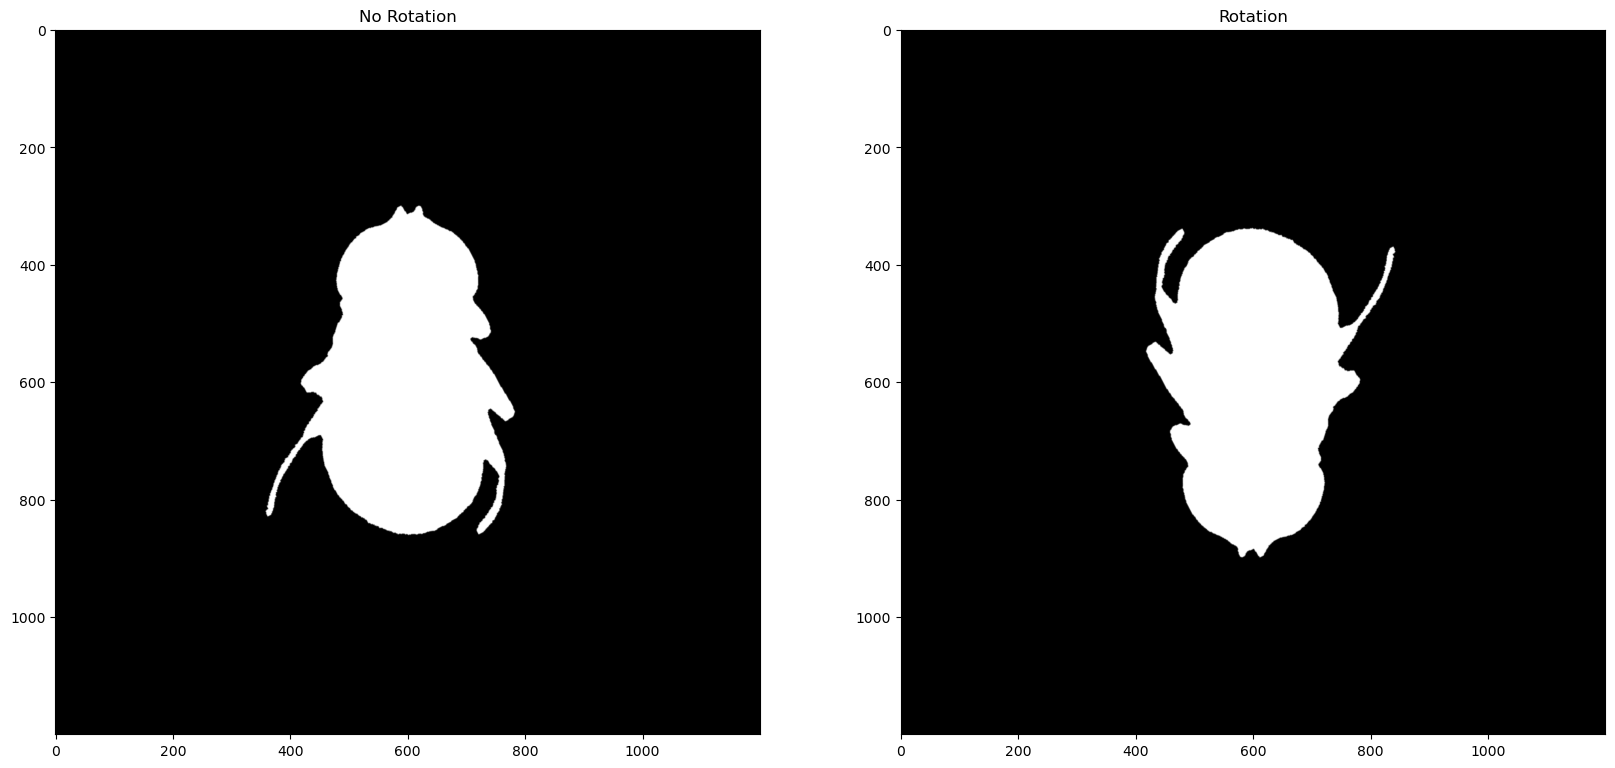

height 1200
Angle Test!
Angle Value: 130.55609576415648
My Angle Value: 81.11219152831295
mask radius 570
Angle Test!
Angle Value: 89.89567622506601
My Angle Value: 359.791352450132


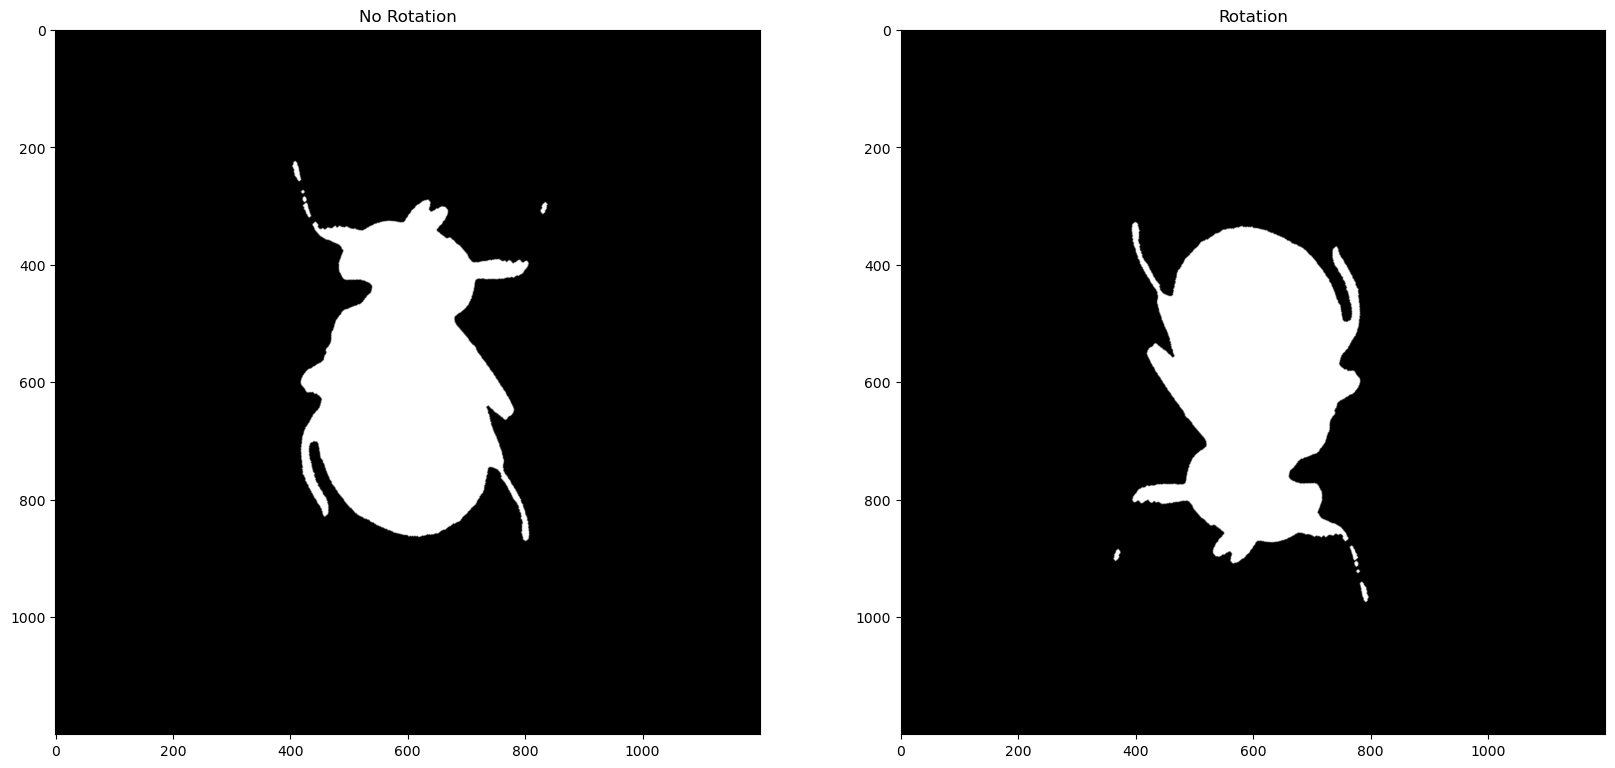

height 1200
Angle Test!
Angle Value: 145.3759522783611
My Angle Value: 110.75190455672218
mask radius 570
Angle Test!
Angle Value: 89.81834130649568
My Angle Value: 359.63668261299136


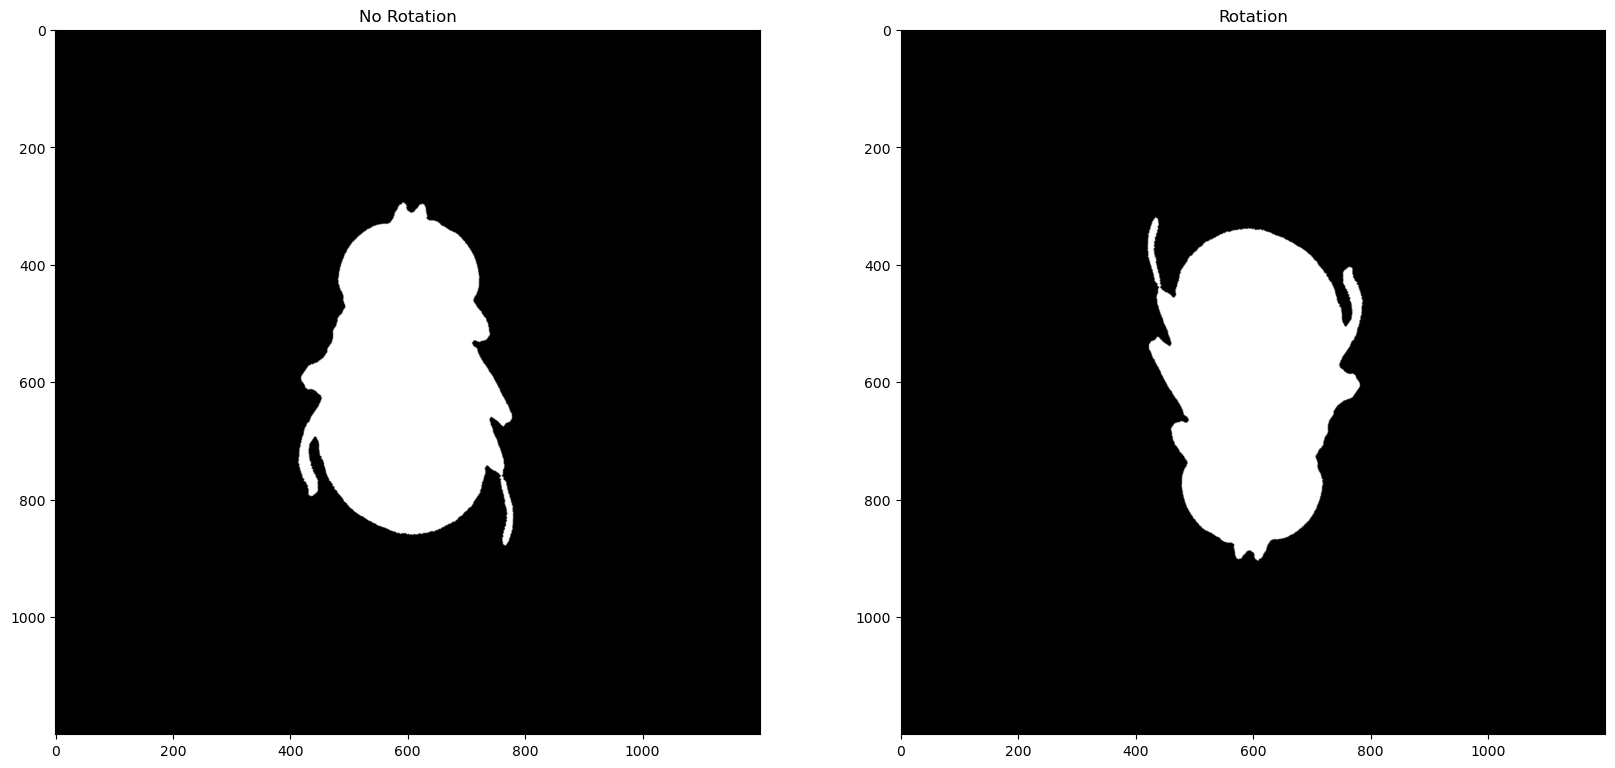

height 1200
Angle Test!
Angle Value: 174.59107665733382
My Angle Value: 169.18215331466766
mask radius 570
Angle Test!
Angle Value: 90.2604205843579
My Angle Value: 0.5208411687158048


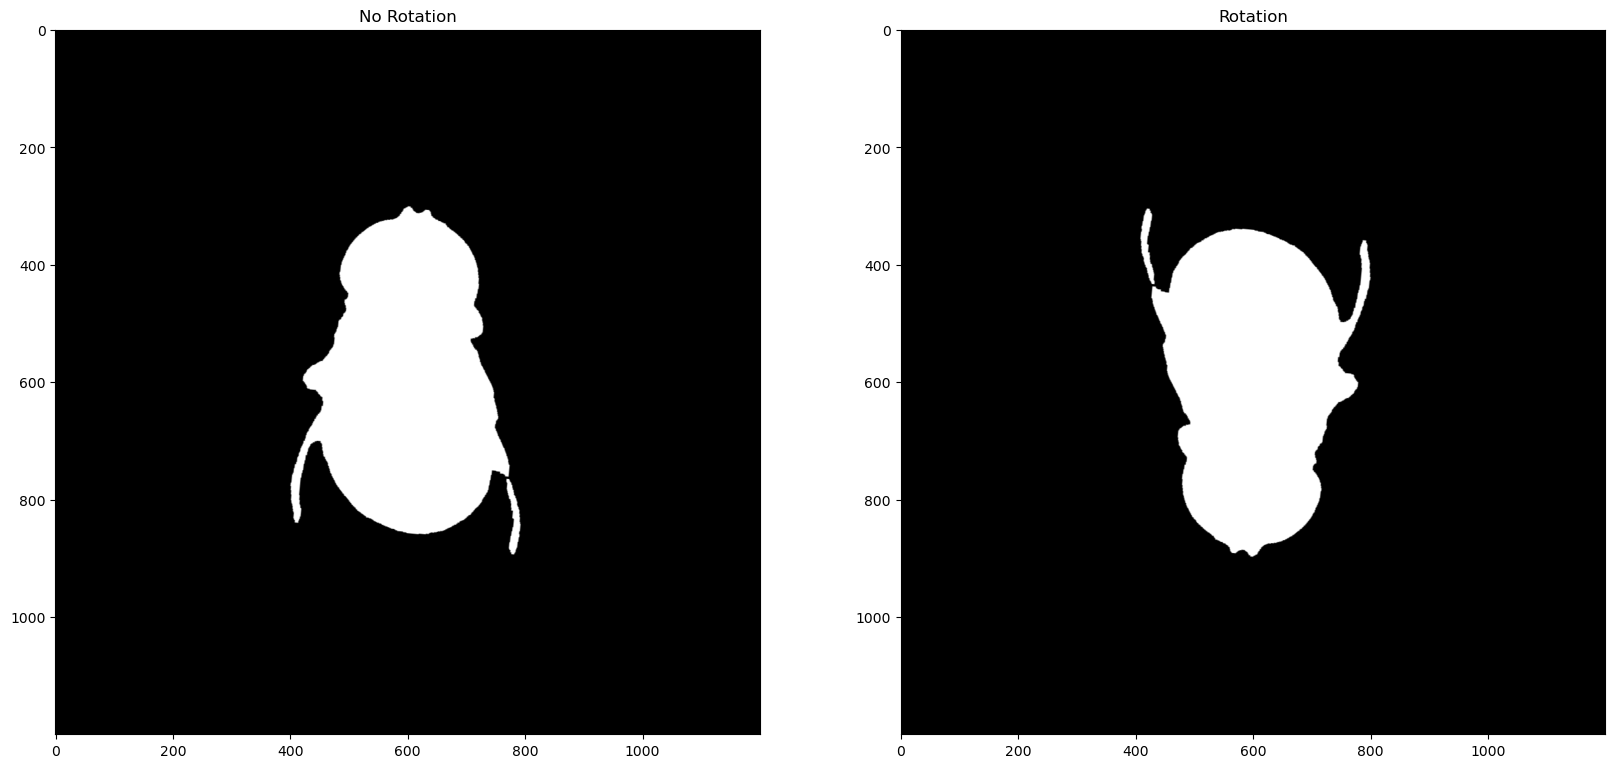

height 1200
Angle Test!
Angle Value: 92.9243153765352
My Angle Value: 5.848630753070381
mask radius 570
Angle Test!
Angle Value: 89.99662291208865
My Angle Value: 359.9932458241773


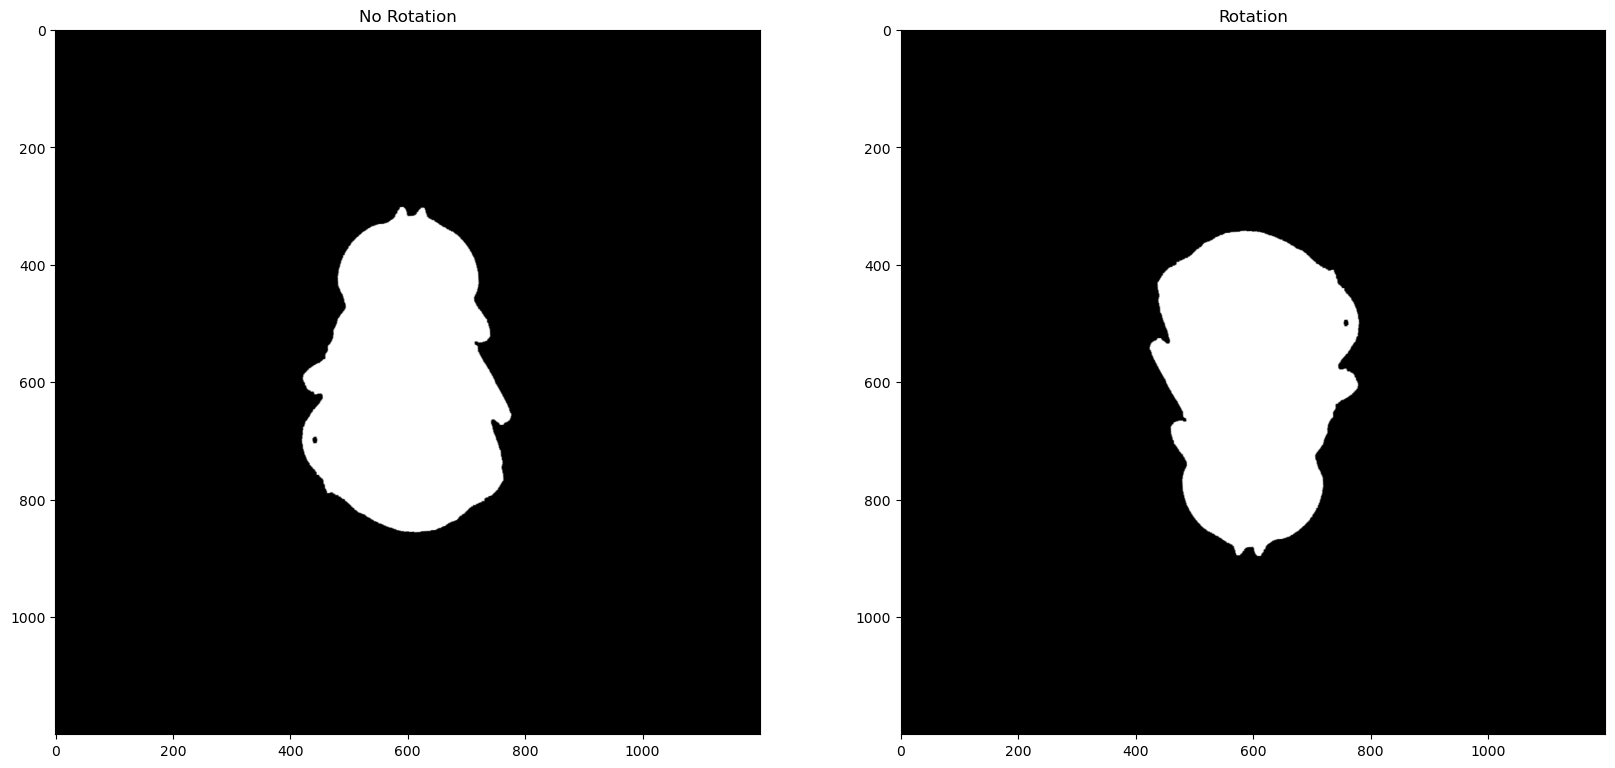

height 1200
Angle Test!
Angle Value: 69.05901018505122
My Angle Value: 318.11802037010244
mask radius 570
Angle Test!
Angle Value: 89.8672572236953
My Angle Value: 359.7345144473906


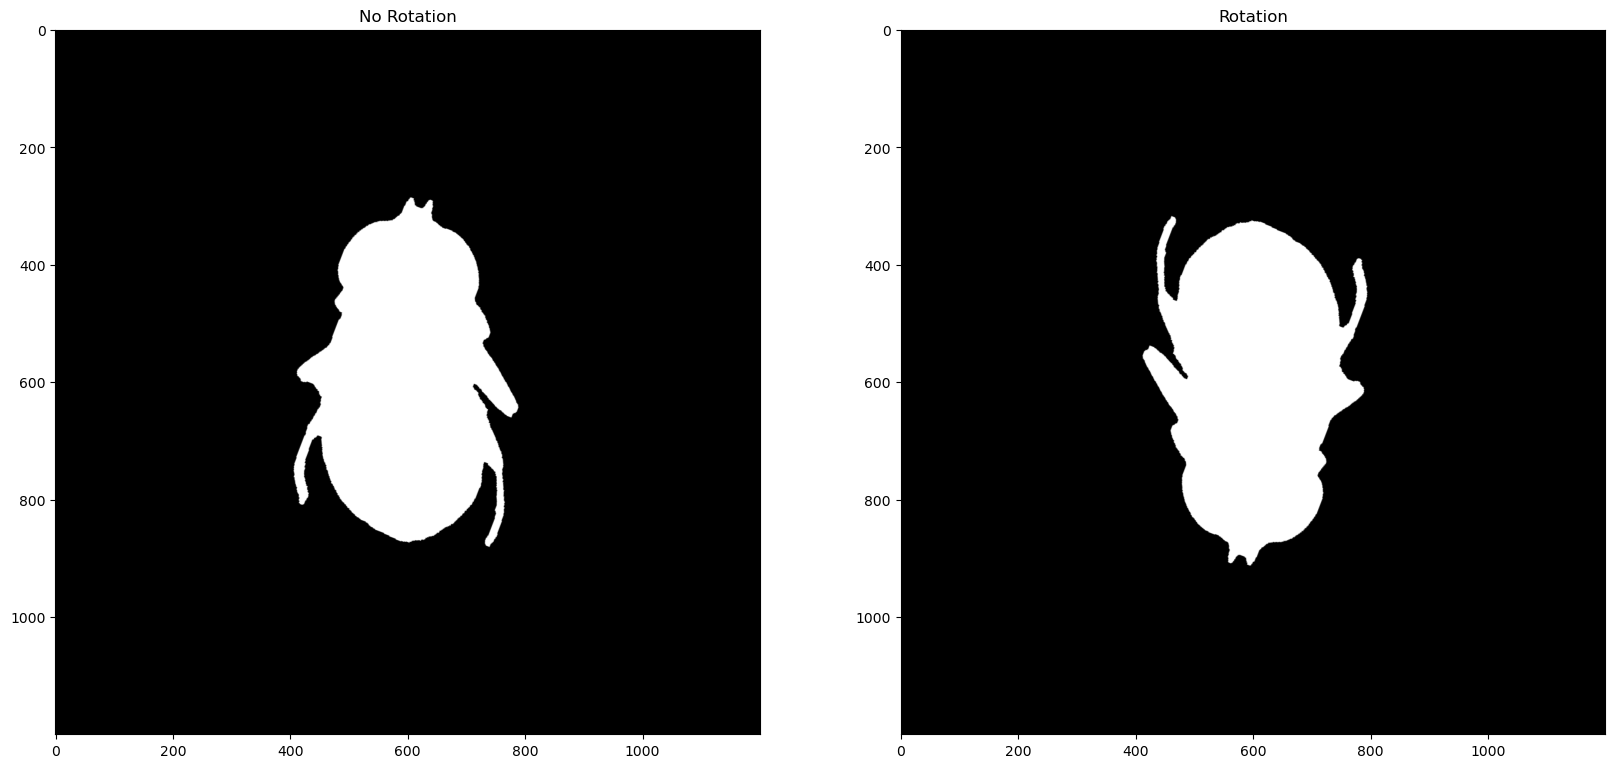

height 1200
Angle Test!
Angle Value: -137.84885497231625
My Angle Value: 264.3022900553675
mask radius 570
Angle Test!
Angle Value: 89.90465377979591
My Angle Value: 359.80930755959184


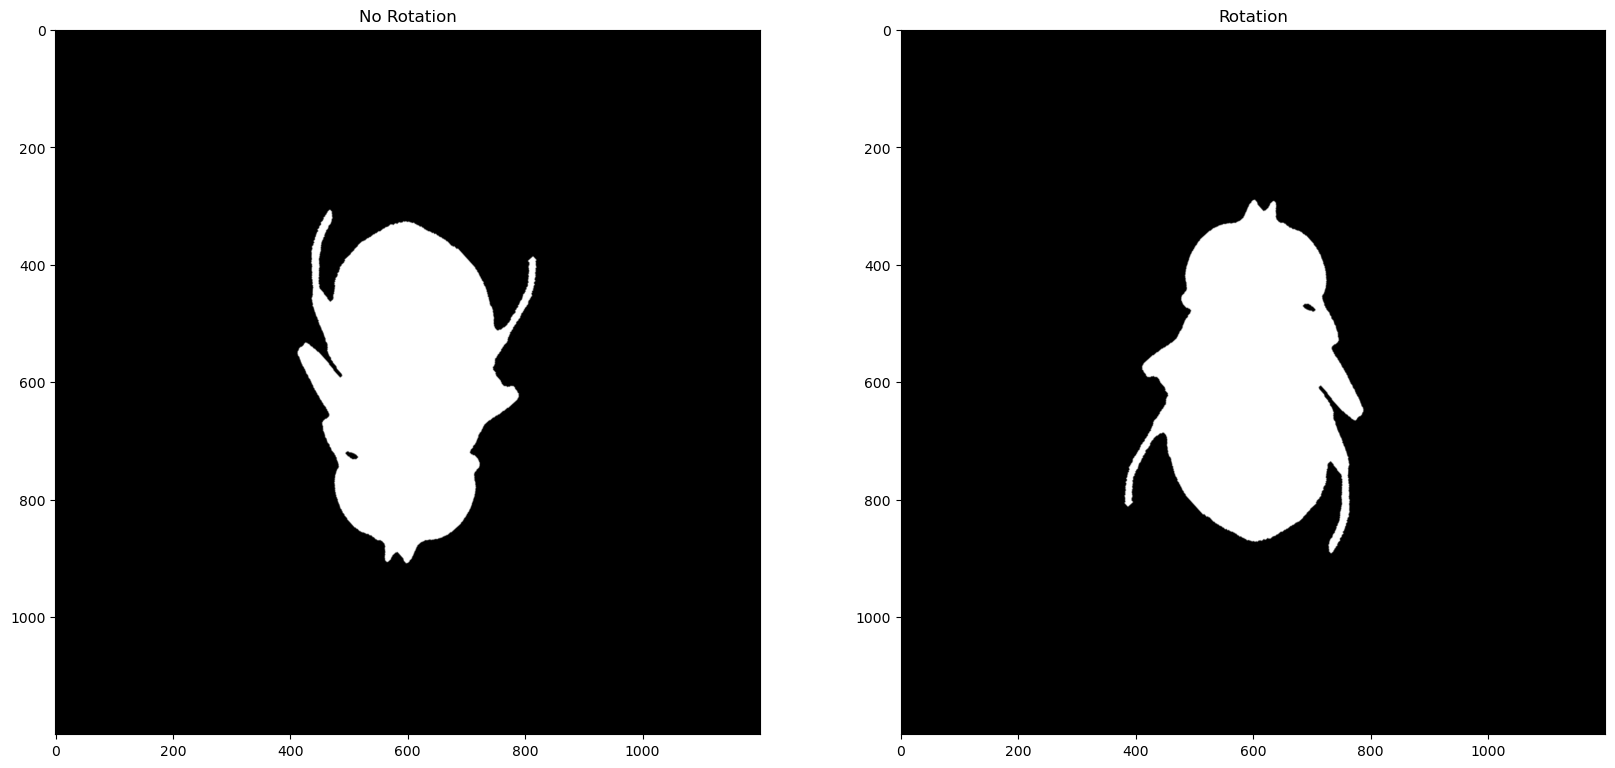

height 1200
Angle Test!
Angle Value: 81.19566276890953
My Angle Value: 342.39132553781906
mask radius 570
Angle Test!
Angle Value: 89.95724329328645
My Angle Value: 359.91448658657293


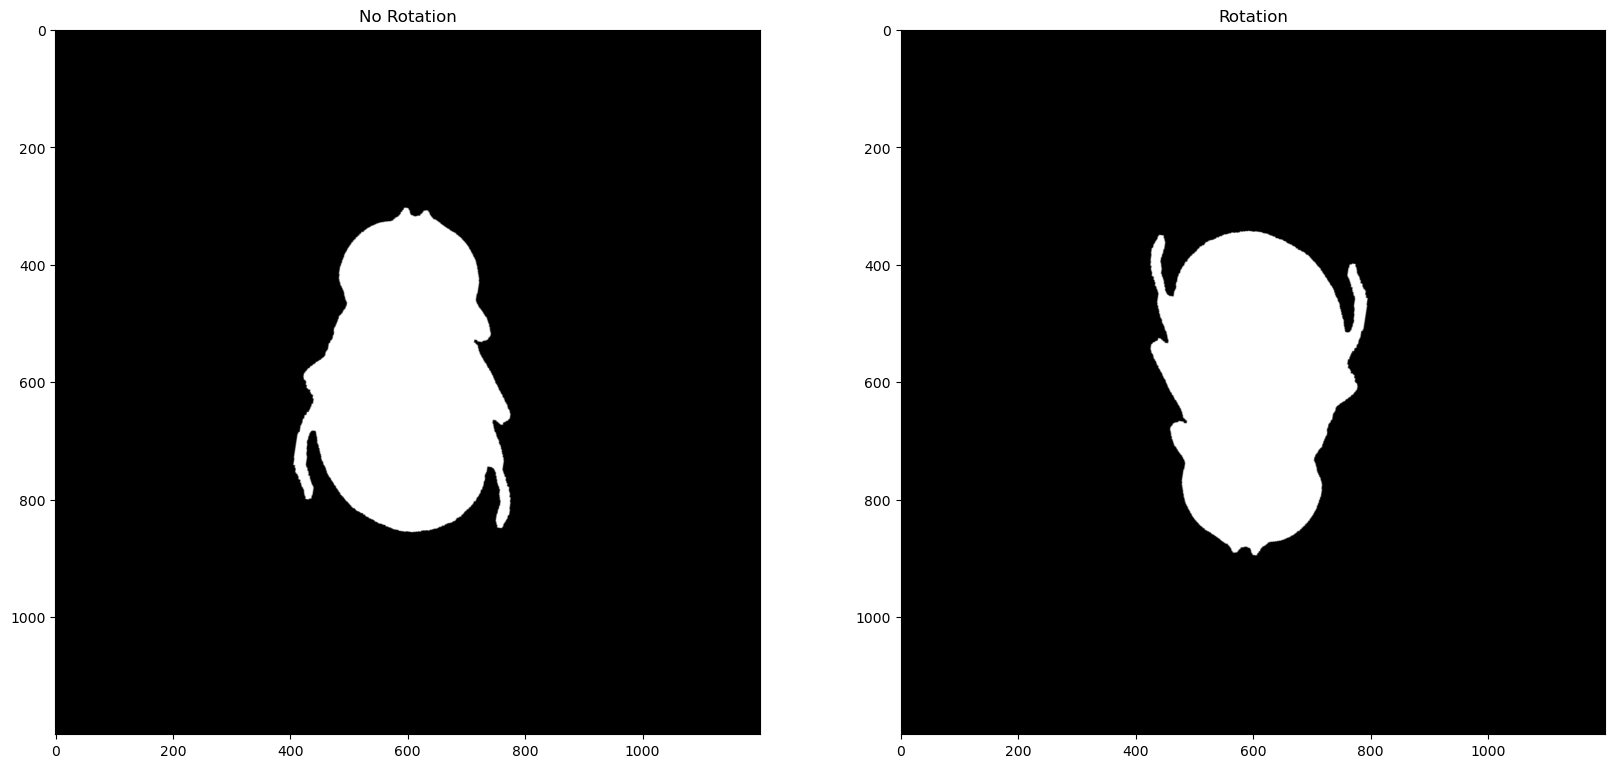

height 1200
Angle Test!
Angle Value: -169.88640437328337
My Angle Value: 200.22719125343326
mask radius 570
Angle Test!
Angle Value: 89.91895357048033
My Angle Value: 359.8379071409606


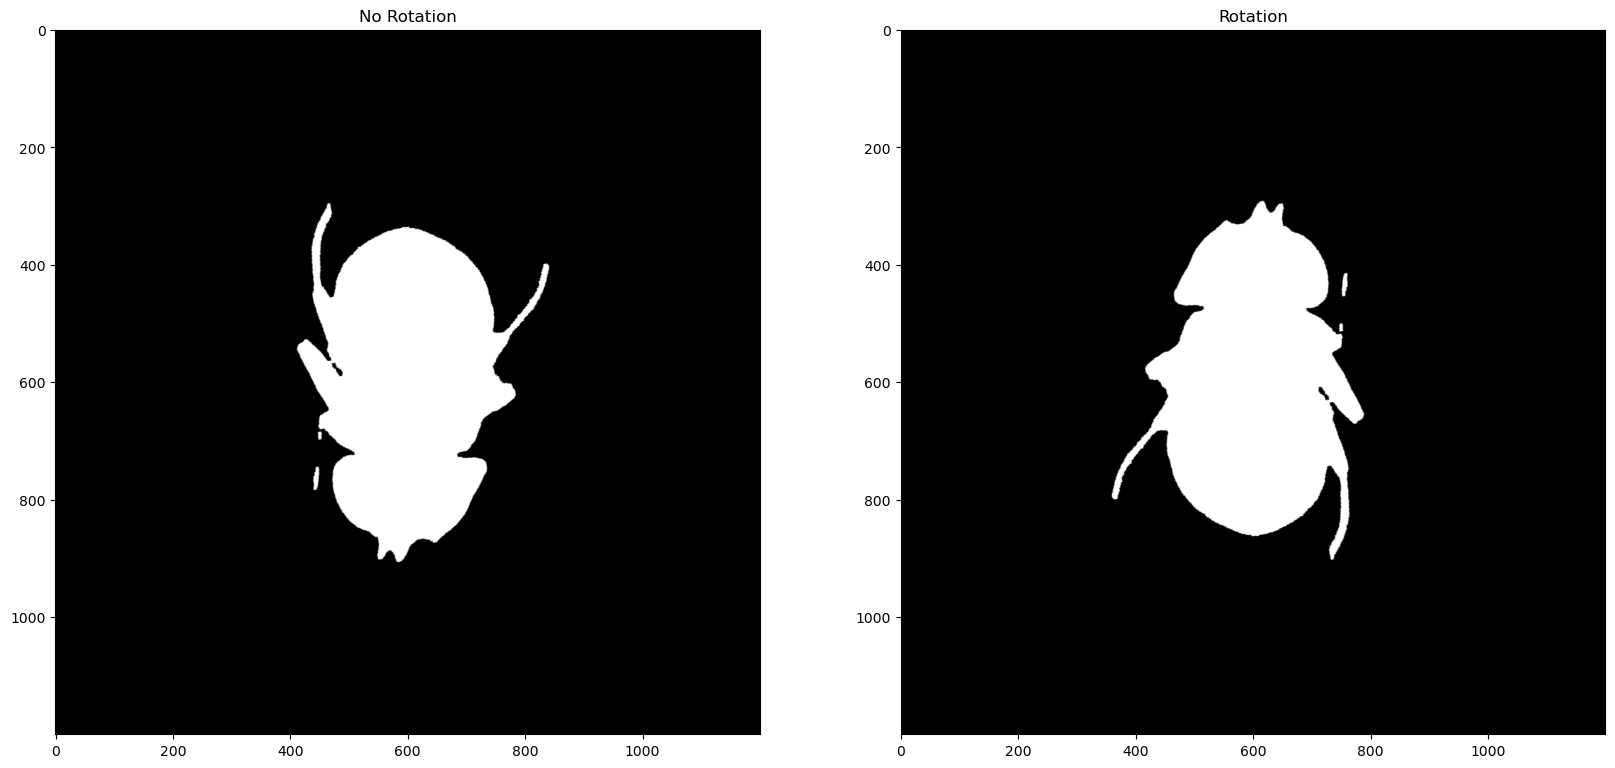

height 1200
Angle Test!
Angle Value: 82.9913451022507
My Angle Value: 345.9826902045014
mask radius 570
Angle Test!
Angle Value: 89.91167975146834
My Angle Value: 359.8233595029367


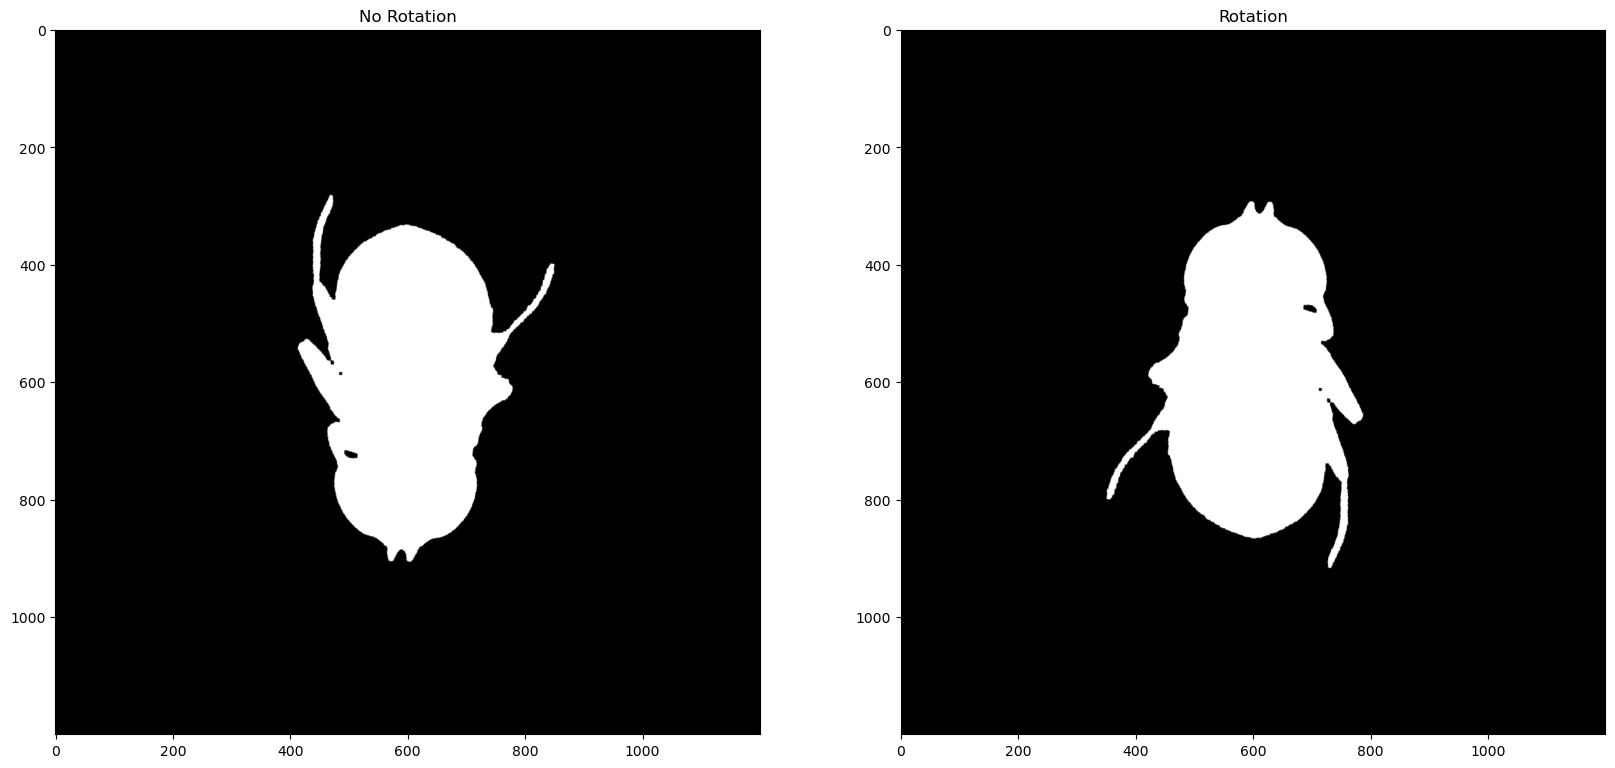

height 1200
Angle Test!
Angle Value: -149.81624590675221
My Angle Value: 240.36750818649557
mask radius 570
Angle Test!
Angle Value: 89.8683020831155
My Angle Value: 359.736604166231


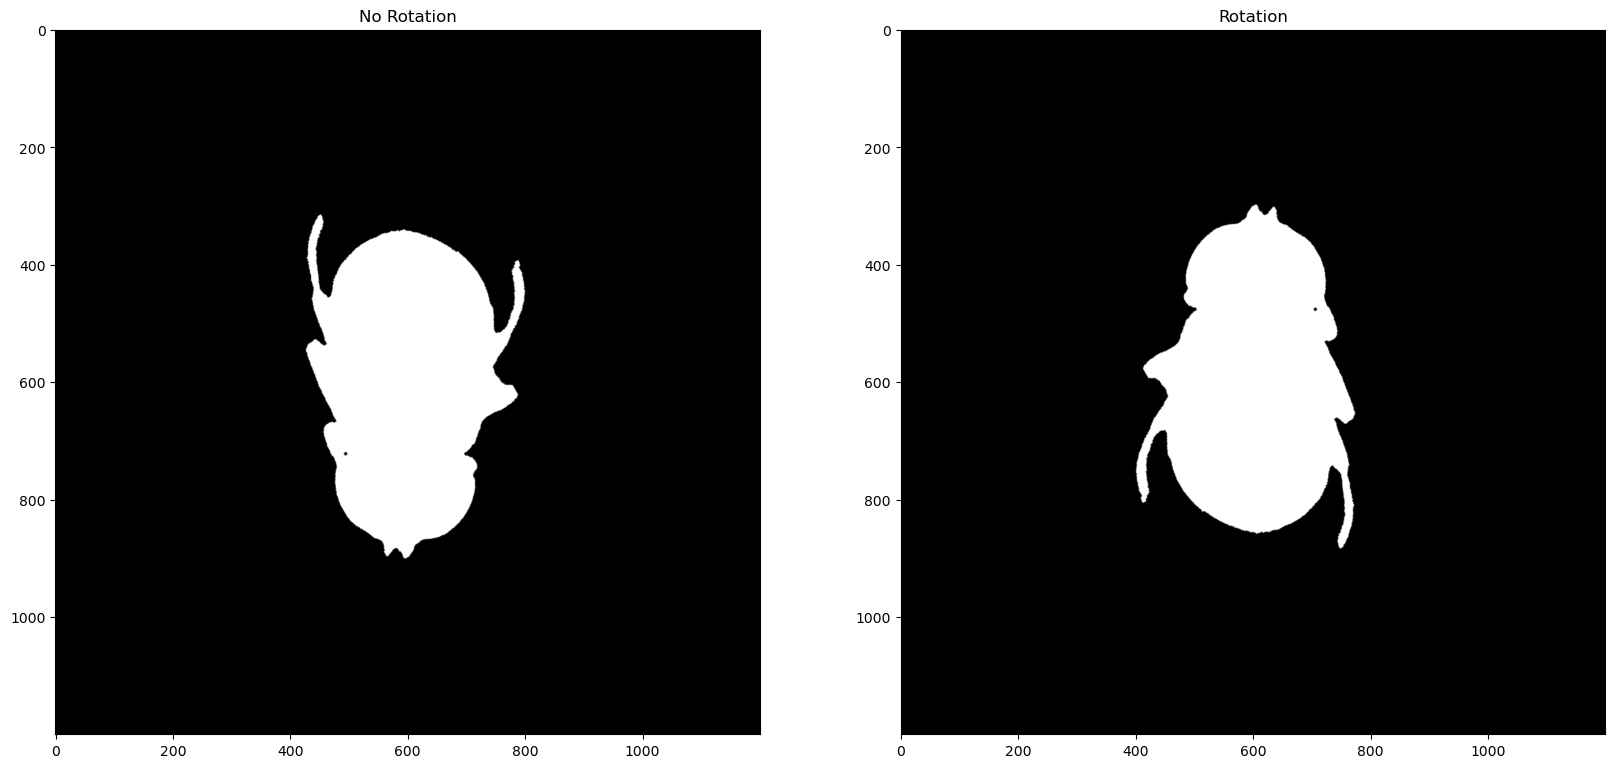

height 1200
Angle Test!
Angle Value: 175.08335464371748
My Angle Value: 170.16670928743497
mask radius 570
Angle Test!
Angle Value: 89.79085386843805
My Angle Value: 359.58170773687607


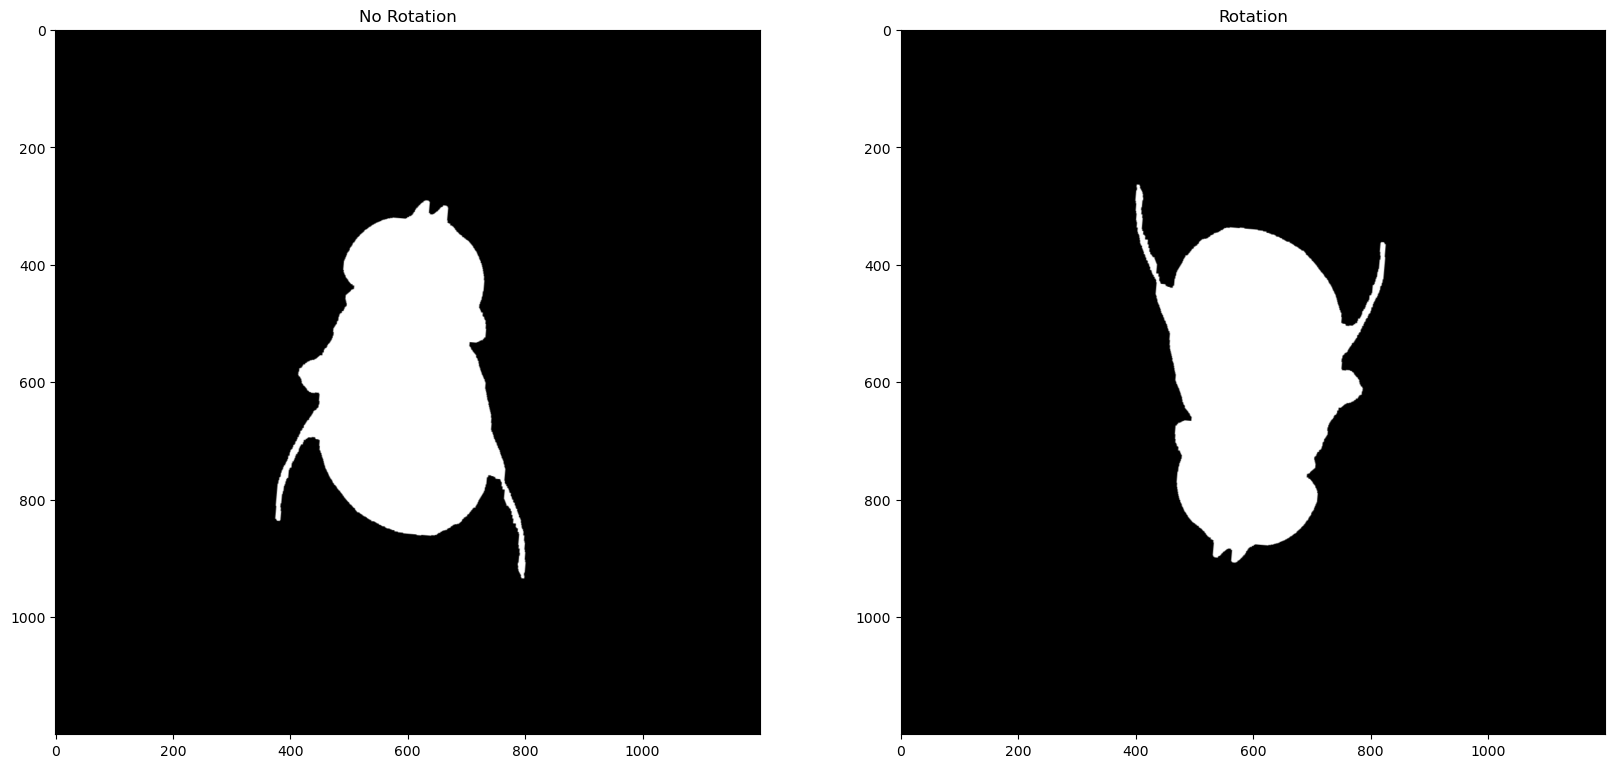

height 1200
Angle Test!
Angle Value: 85.52859406142143
My Angle Value: 351.05718812284283
mask radius 570
Angle Test!
Angle Value: 90.12794688403314
My Angle Value: 0.25589376806624387


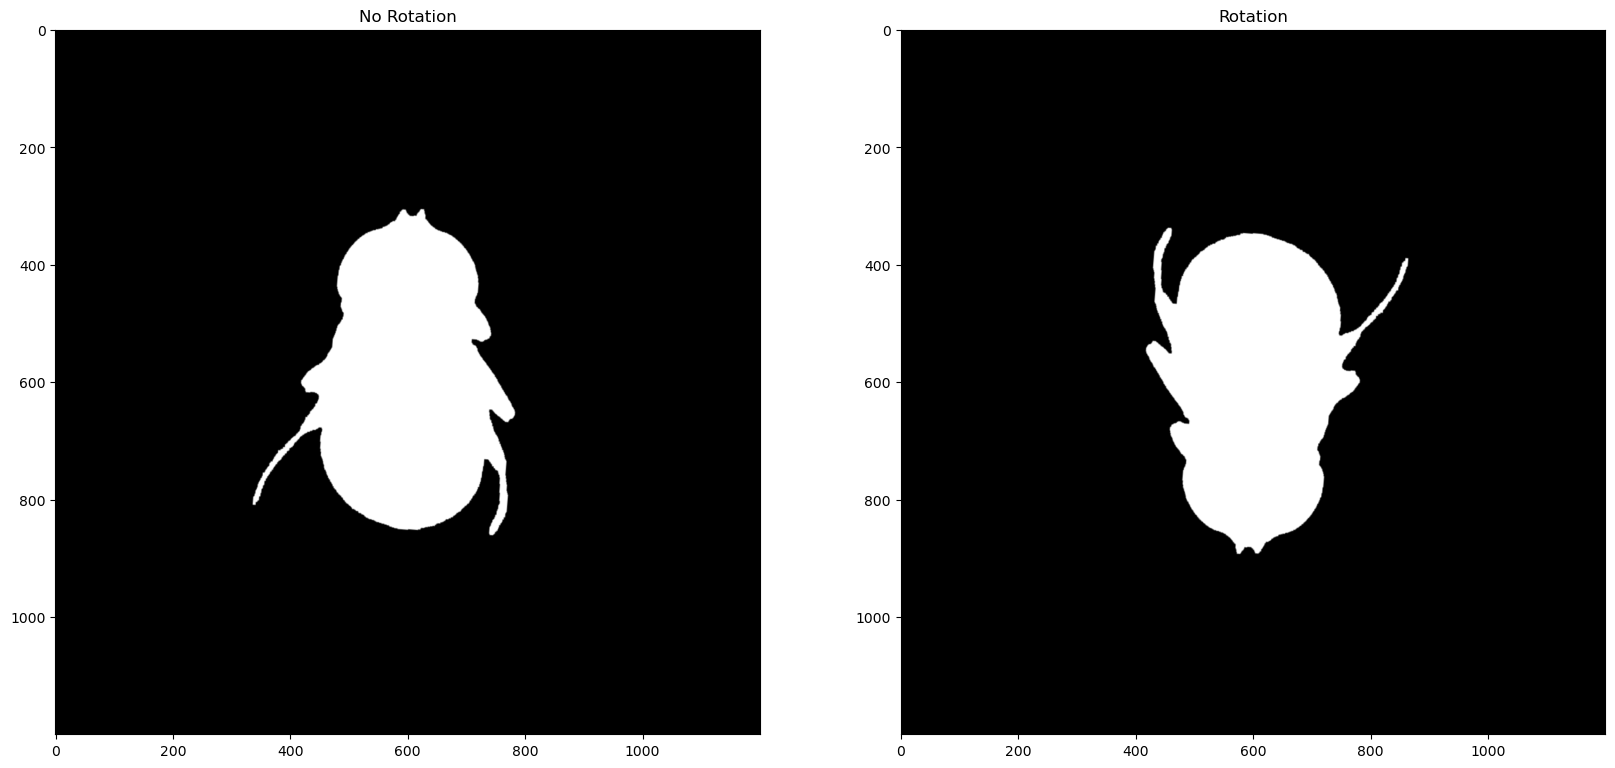

In [20]:
## This dictionary contains the proper rotation, image file name, and the image mask (filled in)
### 
imgs = {}
import time
import glob
import random
def img_label(filename):
    """
    For each image we will need to ensure that the proper rotation is performed such that it is in the 
    top down rotation
    
    """
    fly_mask_hrz,max_contour_hrz,centroid_hrz, body_axis_pt_0_hrz,body_axis_pt_1_hrz = contour_hrz_matrix(filename)
# mask_fly_norot = get_objectmask(fly_mask_hrz,max_contour_hrz)
    mask_fly_rot = cv2.rotate(copy.deepcopy(fly_mask_hrz),cv2.ROTATE_180)
    dict_img ={
        "Orig": fly_mask_hrz,
        "Rot":mask_fly_rot
    }
#     for i in range(1):
    ## test various rotations (0 or 180)
    fig = plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.title("No Rotation")
    plt.imshow(fly_mask_hrz,cmap='gray')
    plt.subplot(1,2,2)
    plt.title("Rotation")
    plt.imshow(mask_fly_rot,cmap='gray')
    plt.show()
    
    fly_up = input("Input the name of No Rotation or Rotation depending on which one display fly pointed up. ")
    mask_fly = dict_img[fly_up]
    
    return mask_fly

# get all of the files in the folder
# shuffled_list = sorted(glob.glob('/media/flyranch/T7 Shield/flyflipimgs/20240502125110/*.png'), key=lambda x: random.random())
shuffled_list = sorted(glob.glob('C:/Users/lkrow/Desktop/20240502125110/*.png'), key=lambda x: random.random())
print(shuffled_list)
for file in shuffled_list[:20]:
    name = file.split('/')[-1].strip('.png')
    mask_fly = img_label(file)
    imgs[name] = mask_fly
    # execute function and then add these images and etc to the dictionary
# imgs
# img_label("imgs/20240416133324_7778.png")

In [21]:
imgs

{'20240502125110\\20240502125110_6321': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '20240502125110\\20240502125110_1843': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '20240502125110\\20240502125110_3776': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '20240502125110\\20240502125110_7251': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ...

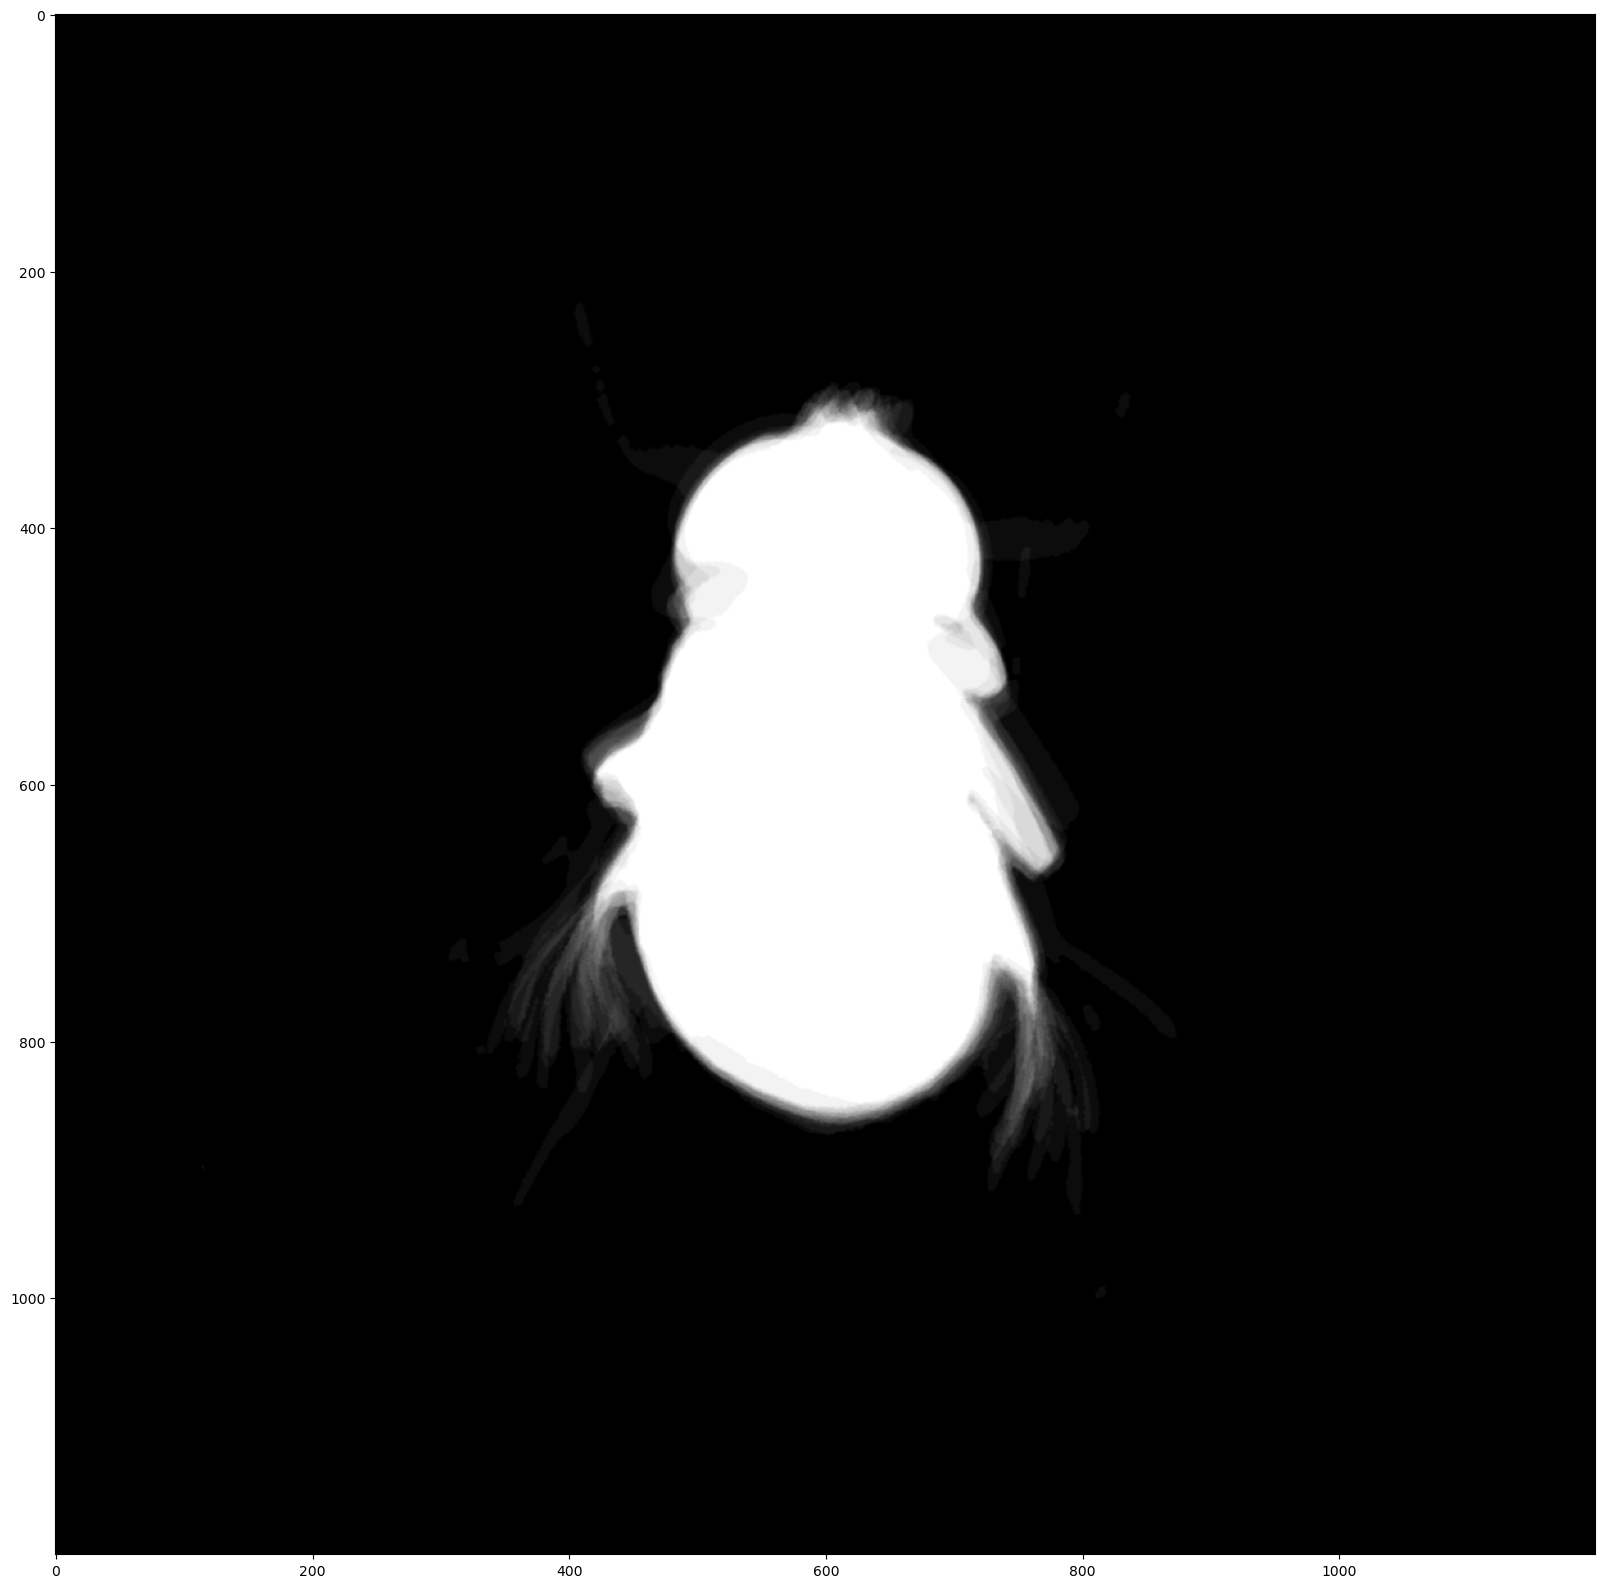

In [24]:
### Now with all the images we will create a mean tempate mask
#### HOWEVER FIRST FOR EACH MASK IT NEEDS TO BE FILLED IN USING OUR FILL METHOD...
final = []
for img in imgs.keys():
    final.append(imgs[img])
# print(final)
stacked = np.stack(final,axis=-1)
avg_mask = np.mean(stacked, axis = -1)
plt.figure(figsize=(20,20))
plt.imshow(avg_mask,cmap = 'gray')

In [1]:
# testing
plt.figure(figsize=(20,20))
print(avg_mask[0])
avg_mask[30] = 255*np.ones(len(avg_mask[30]))
plt.imshow(avg_mask,cmap ='gray')

NameError: name 'plt' is not defined

In [123]:
avg_mask.dtype

dtype('float64')

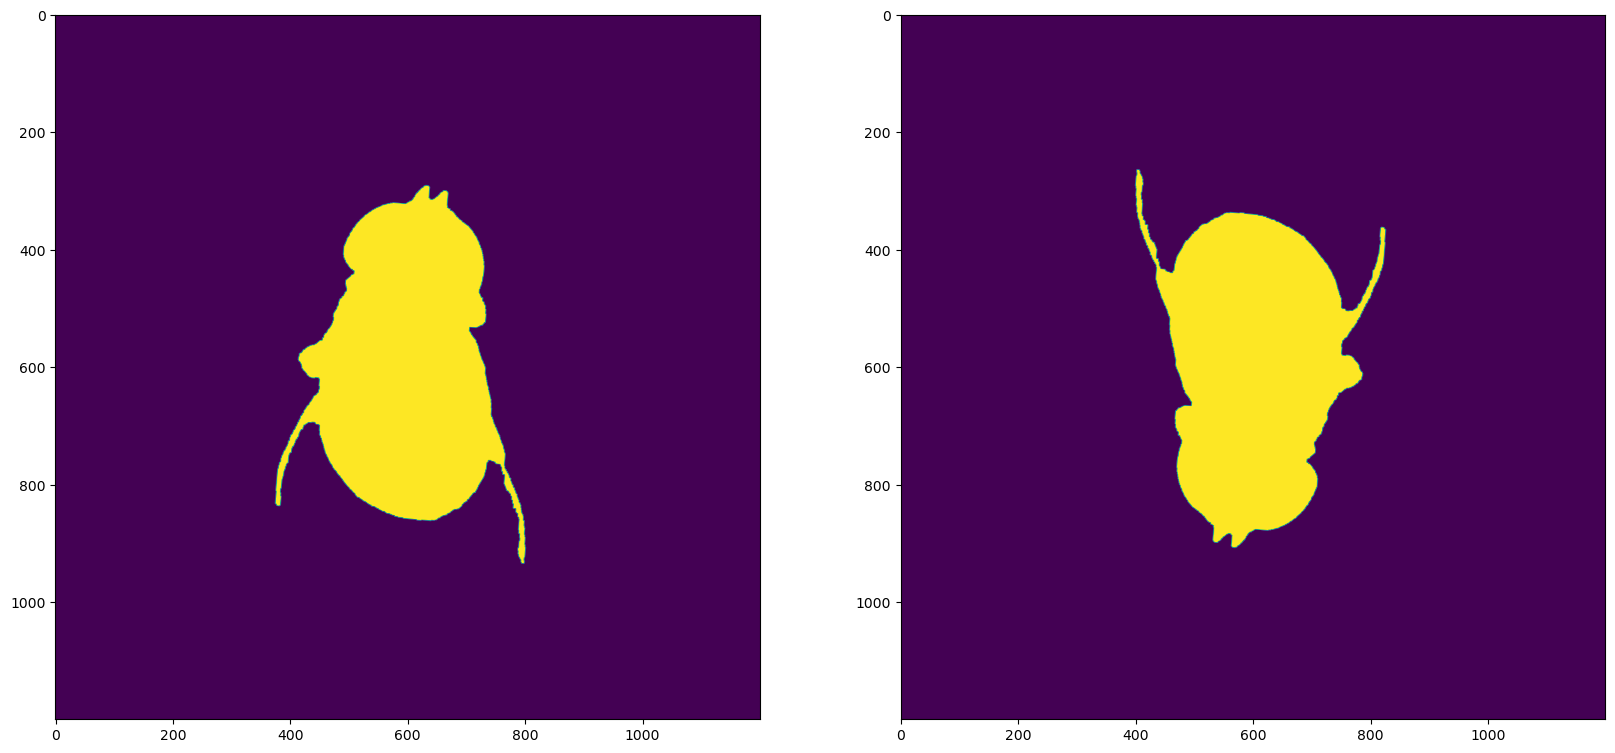

In [25]:
avg_mask.dtype
imgs[list(imgs.keys())[0]].dtype
img1 = imgs[list(imgs.keys())[18]].astype('float64')
# img2 = cv2.rotate(cv2.ROTATE_180
avg_mask.dtype
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(cv2.rotate(img1,cv2.ROTATE_180))

In [26]:
## Comparison between two images
def mse(img1, img2):
    area_px = img1.shape[0]*img1.shape[1]
    px_diff = cv2.subtract(img1, img2)
    sum_err = np.sum(px_diff**2)
    mse = sum_err/(float(area_px))
    return mse
error = mse(avg_mask,img1)
error2 = mse(avg_mask,cv2.rotate(img1,cv2.ROTATE_180))
print("No rotation:",error)
print("Rotation:",error2)

No rotation: 407.7330242656249
Rotation: 1469.1312039184031


In [3]:
# Generate fly plot MSE 1 to MSE 2
## MSE 1 is the HEad, MSE 2 is the back

## Development of classification basd on this plot generated by the user..

In [2]:
## Generate file correction...
## No data in cluster for given fly... see the variability...

In [ ]:
## Generate a video from data that is clearly misaligned

## Then recreate the video where the fly is head aligned

## 

In [ ]:
## Need to look at plot and then from 

height 1200
Angle Test!
Angle Value: 144.78860513457386
My Angle Value: 109.57721026914768
mask radius 570
Angle Test!
Angle Value: 89.79307468877388
My Angle Value: 359.58614937754777


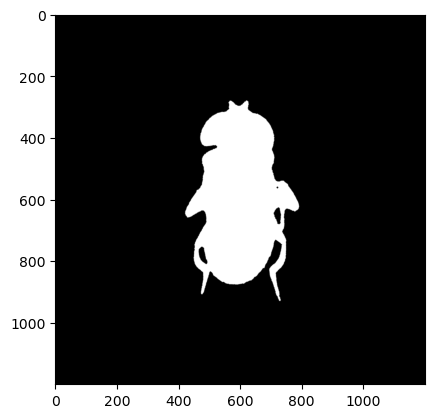

In [32]:
fly_mask_hrz,max_contour_hrz,centroid_hrz, body_axis_pt_0_hrz,body_axis_pt_1_hrz=contour_hrz_matrix('imgs/20240423102146_8500.png')
plt.imshow(fly_mask_hrz,cmap='gray')

In [31]:
fly_mask_hrz = fly_mask_hrz.astype('float64')
error = mse(avg_mask,fly_mask_hrz)
error2 = mse(avg_mask,cv2.rotate(fly_mask_hrz,cv2.ROTATE_180))
print("No rotation:",error)
print("Rotation:",error2)

No rotation: 1222.300330862847
Rotation: 1562.5817880156255


In [ ]:
## Method for iterating over a whole bunch of images
### Determine whether og image or flip is better...

## Image List


## Determine Rotation vs No Rotation MSE


## LOW MSE -> That is the correct rotation


## Map the location of the head... 

Blah = intersect_up(arr_min,max_contour)



## Method: Moments

658
900


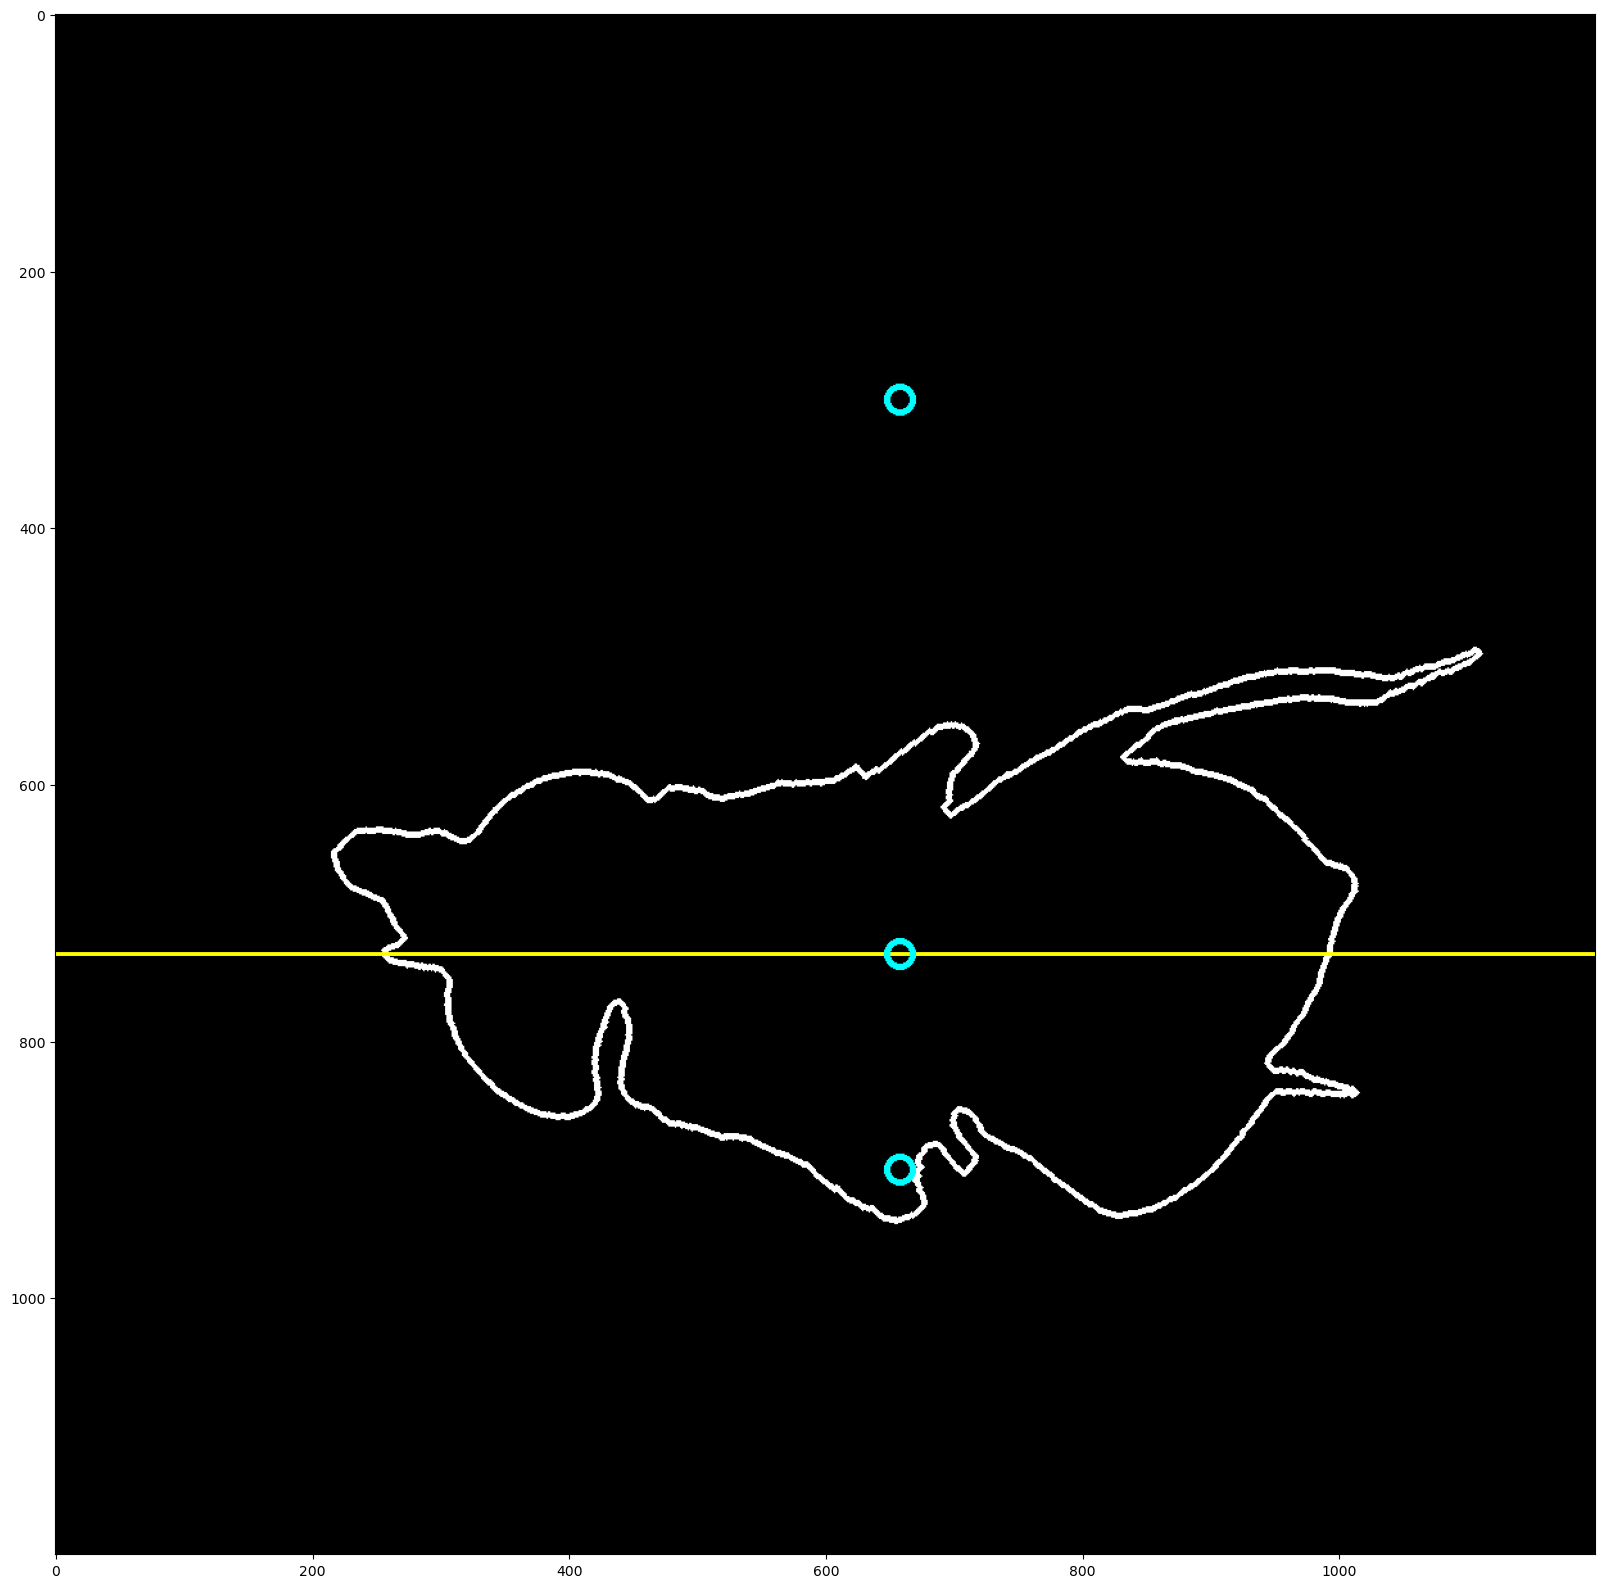

In [3]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask_adj,unrot_vec)

cv2.circle(mask_fly,body_axis_pt_0_adj,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,body_axis_pt_1_adj,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0_adj,body_axis_pt_1_adj,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)
# First Quarter
quart1_x, quart1_y = int(centroid_adj[0]), int(0.25*mask_fly.shape[1]) # First Quarter...
cv2.circle(mask_fly,(quart1_x, quart1_y),10, color = (0,255,255),thickness =3 )
print(quart1_x)
# Last Quarter
quart3_x, quart3_y = int(centroid_adj[0]), int(.75* mask_fly.shape[1]) 
cv2.circle(mask_fly,(quart3_x, quart3_y),10, color = (0,255,255),thickness =3)
print(quart3_y)
# cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
cv2.circle(mask_fly,centroid_adj,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly)

(1200, 1200)


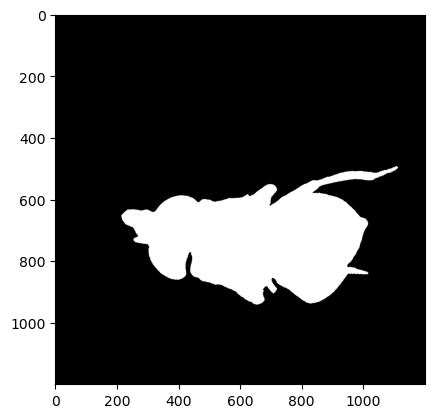

In [6]:
mask_fly = get_fill_flymask(fly_mask_adj,unrot_vec)
print(mask_fly.shape)
# img_fly = cv2.cvtColor(mask_fly, cv2.COLOR_BGR2GRAY)
# print(img_fly.shape)
plt.imshow(mask_fly, cmap ='gray')

height 1200
Angle Test!
Angle Value: 144.78860513457386
My Angle Value: 109.57721026914768
mask radius 570
YO
<class 'numpy.ndarray'> (2, 3)
144.78860513457386 -54.78860513457386 35.21139486542614
float64 int32
(2245, 2) (2245, 1)
(2, 3) (2, 2) (2245, 2)
Unrotated
[[-247.09676579  110.79796178]]

coords
(600.0, 705.8212718945031) (600.0, 571.1794797456831)

Applied
[[458 681]]
(215, 917) old body axis
(2, 2) (1, 2) [[-490]
 [ 346]]
[[905]
 [  5]] new body axis 0
(1195, 225) old body axis 1
(2, 2) (1, 2) [[ 490]
 [-346]]
[[ 504]
 [1136]] new body axis 1
ANGLE: 2.5270378789682812 144.78860513457386
Angle Test!
Angle Value: -179.99540538347065
My Angle Value: 180.00918923305872
(1200, 1200)


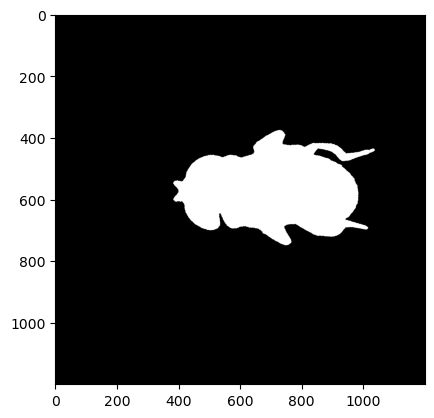

In [7]:
file ="20240423102146_8500"
file_name = "imgs/" + file +".png"
# fly_mask, max_contour,centroid, body_axis_pt_0,body_axis_pt_1 = get_contour_centroid(file_name)
fly_mask_adj, max_contour_adj,centroid_adj, body_axis_pt_0_adj,body_axis_pt_1_adj,unrot_vec  = contour_rot_matrix(file_name)
mask_fly = get_fill_flymask(fly_mask_adj,unrot_vec)
print(mask_fly.shape)
# img_fly = cv2.cvtColor(mask_fly, cv2.COLOR_BGR2GRAY)
# print(img_fly.shape)
plt.imshow(mask_fly, cmap ='gray')


In [8]:



## Get moment
def get_moment(image,k=2):
    data = image.sum(axis=0)
    weighted_data = data*np.arange(data.shape[0])**k
    return  weighted_data.sum()

# Moment for first 1/4
quart1_x, quart1_y = int(centroid_adj[0]), int(0.25*mask_fly.shape[1]) # First Quarter...
image_0 = np.array(mask_fly)
image_0[:,int(quart1_y)-1:] = 0
image_0 = image_0[:,:int(quart1_y)+1]
moment_0 = get_moment(image_0,2)


# Moment for last 1/4
# Last Quarter
quart3_x, quart3_y = int(centroid_adj[0]), int(.75* mask_fly.shape[1]) 
image_1= np.array(mask_fly)
image_1[:,:int(quart3_y)] = 0
image_1 = np.fliplr(image_1)
image_1 = image_1[:,int(quart3_y):]
moment_1 = get_moment(image_1,2)


# Compute descriminant and flip flag
discrim = (moment_0 - moment_1)/(moment_0 + moment_1)
if discrim < 0:
    ok = False
    print(ok)
else:
    ok = True 
    print(ok)

True


C:\Users\lkrow\AppData\Local\Temp\ipykernel_11632\528346281.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  discrim = (moment_0 - moment_1)/(moment_0 + moment_1)


In [41]:
def get_cv_moment(image):
    moments = cv2.moments(image, binaryImage=True)
    # Example: Returning the spatial moment m00 (which is the sum of all pixel values)
    return moments['m00']

img_fly = cv2.cvtColor(mask_fly, cv2.COLOR_BGR2GRAY)
# Compute moments using OpenCV moments
moment_0_cv = get_cv_moment(image_0)
moment_1_cv = get_cv_moment(image_1)

error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x59191d0d::Set<1,-1,-1>,struct cv::impl::A0x59191d0d::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


## Method 3: NOT Working Version...NEED TO FIND FIX TO CENTER FLY IN IMAGE??? -> Maybe just apply everything to image and then execute a rotation...
Essentailly the past two methods did not center the fly in the image
This method does that centering as well as adjustment to align the centerline on the y axis and do the rotation. It does this for the contours as well as 
the body axis line as well..

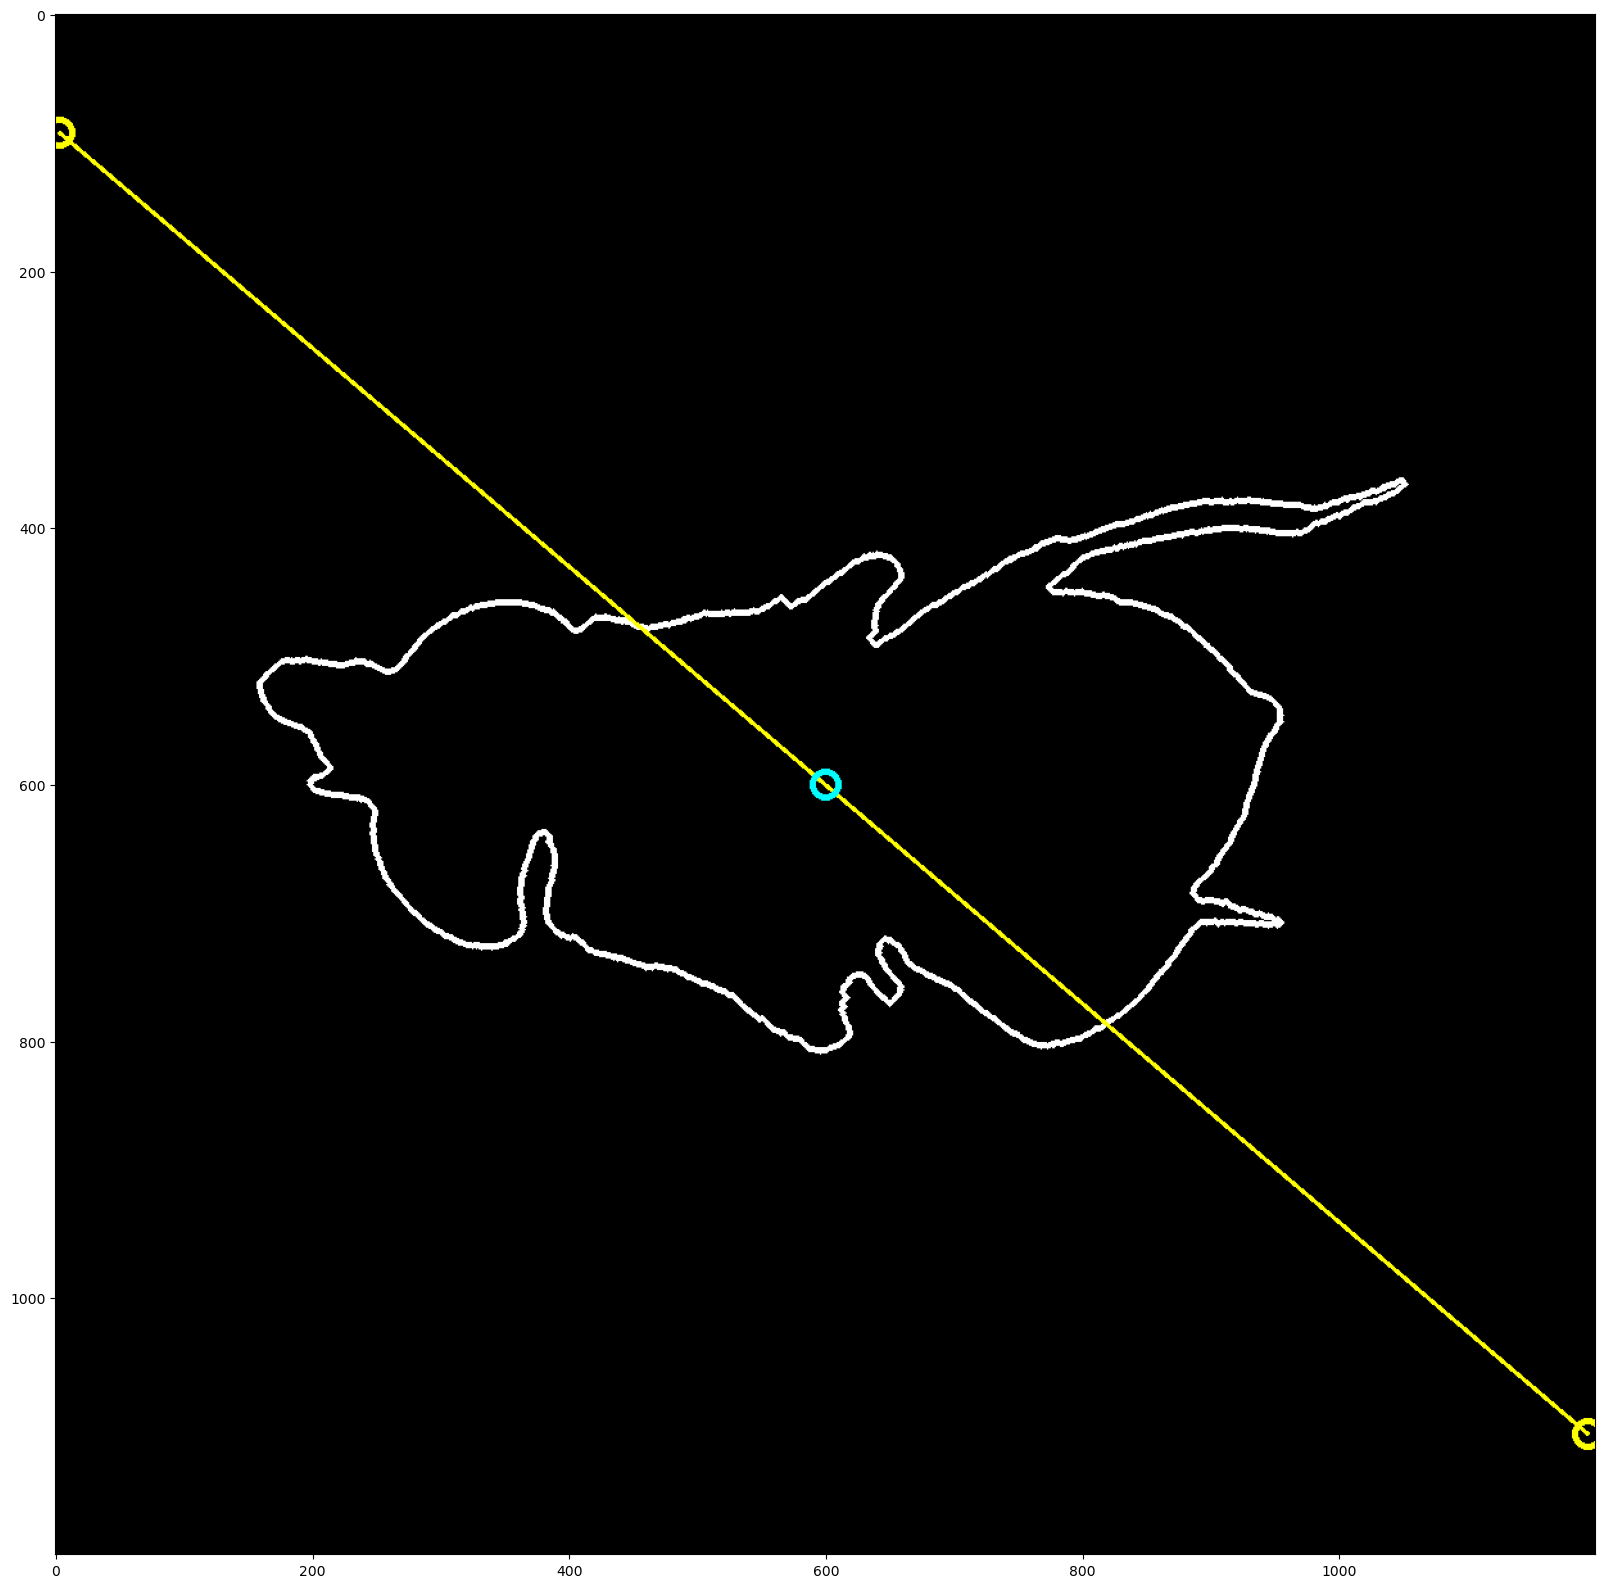

In [3]:
plt.figure(figsize=(20,20))
mask_fly2 = get_objectmask(fly_mask_adj2,unrot_vec2)

cv2.circle(mask_fly2,body_axis_pt_0_adj2,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly2,body_axis_pt_1_adj2,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly2,body_axis_pt_0_adj2,body_axis_pt_1_adj2,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)

# cv2.circle(mask_fly,(max_contour[intersect[0][1]]),10, color = (0,255,255),thickness =3 )

# cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
cv2.circle(mask_fly2,centroid_adj2,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly2)

### Draw the Buffer Line

- [`X`] Draw a line of fixed width X across the centroid 

- [   ] Using this line also draw lines that are parallel to the centerline up and down

- [   ] Then plot the points at which it intersects on the fly

- [   ] After this point We will be able to get contour sections from top and bottom. 

- [   ] These will then be plotted in two different orientations.

- [   ] In this method after we have plotted in two different orientations then the user will deciede which is top and which is bottom. In the future we will utilize.


#### 1. Draw Line of Fixed width across centroid

Fixed Width will start with 100px


In [5]:
plt.figure(figsize=(20,20))
mask_fly3 = copy.deepcopy(mask_fly2)
## Point 1: 50 points to right
p1 = (centroid_adj2[0] + 50, centroid_adj2[1])
## Point 2: 50 points to left
p2 = (centroid_adj2[0] - 50,centroid_adj2[1])
cv2.circle(mask_fly3,p1,8, color = (0,255,0),thickness =2)
cv2.circle(mask_fly3,p2,8, color = (0,255,0),thickness =2)
cv2.line(mask_fly3,(p1[0]-8,p1[1]),(p2[0]+8,p2[1]),color = (0,255,0), thickness = 2)
plt.imshow(mask_fly3)

NameError: name 'copy' is not defined

<Figure size 2000x2000 with 0 Axes>

In [6]:
x1 = body_axis_pt_0_adj2[1]
x2 = body_axis_pt_1_adj2[0]
y1 = body_axis_pt_0_adj2[1]
y2 =body_axis_pt_1_adj2[1]
print(x1,x2)
if (x2-x1 ) == 0:
    print("undefined")
else:
    print(x2-x1)
    m = (y2 - y1)/(x2-x1)
    print(m)

# # y = mx+b
# b = y1 - m*x1
# print(b)

# x = np.linspace(x1,x2+1, num = len(max_contour))
# y = m*x + b
# print(y)
# points = []
# for i in range(len(x)):
#     points.append((int(x[i]),int(y[i])))
# print(points)

1188 116
-1072
1.0979477611940298


#### 2. Draw Parallel Lines From p1 and p2 until intersection with top and bottom of object contour

Created the Line first, and then considered the possible intersection points on the contour with this line..

In [ ]:
## 
def parallel_lines(point1,point2,centroid):
    """
    Using two points and centroid determine two lines that are parallel 
    to the centroid's centerline. Returns a tuple of two arrays describing the parallel
    lines.

    Parameters:
    -----------
    point1 : tuple
        describes the x,y pixel location of a point located 50px to right of centroid
    point2 : tuple
        describes the x,y pixel location of a point located 50px to the left of centroid
    
    Returns:
    --------
    par1 : array
        array of points for parallel line interesecting point 1
    par2 : array
        array of points for parallel line intersecting point 2
    """
    


In [ ]:
plt.figure(figsize=(20,20))
mask_fly4 = copy.deepcopy(mask_fly3)


## OLD METHODS : USE AS REFERENCE
These methods below used a non aligned contour..

In [24]:
# take the 30 contour points to the lefts and right of the two intersections and plot
adj_intersect = [(intersect[0][1]+50,intersect[0][1]-50),(intersect[1][1]+50,intersect[1][1]-50)]
print(adj_intersect)

[(2165, 2065), (545, 445)]


In [5]:
np.array(body_axis_pt_0)

array([1162, 1329])

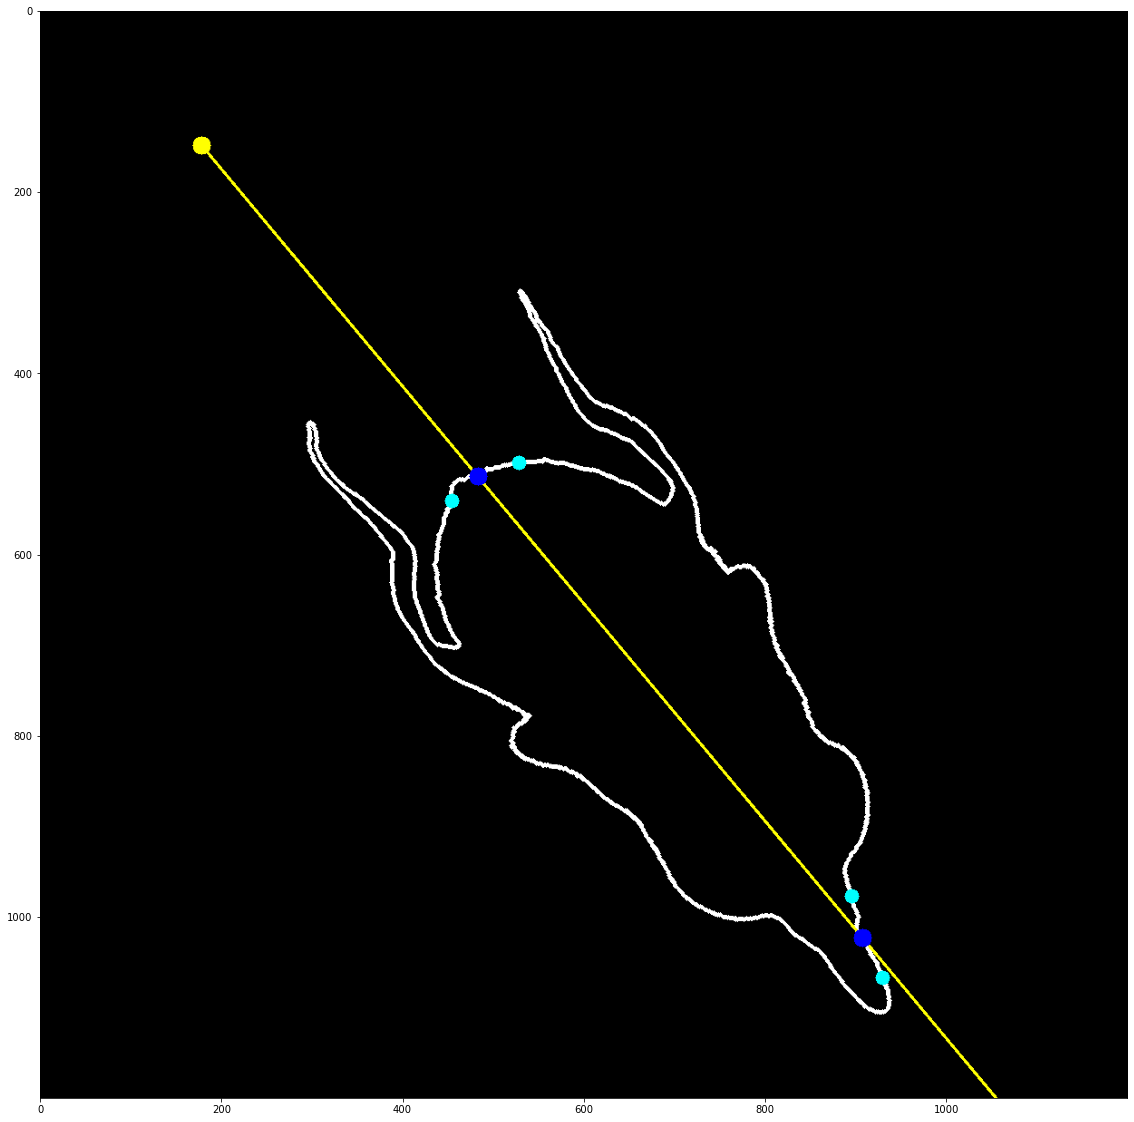

In [25]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask,max_contour)
cv2.circle(mask_fly,(body_axis_pt_0),10, color = (255,255,0),thickness =-3)
cv2.circle(mask_fly,(body_axis_pt_1),10, color = (255,255,0),thickness =-3)
cv2.line(mask_fly,body_axis_pt_0,body_axis_pt_1,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)
# front 
cv2.circle(mask_fly,(max_contour[intersect[0][1]][0]),10, color = (0,0,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[0][1]][0]),8, color = (0,255,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]][0]),8, color = (0,255,255),thickness =-1 )


# cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]+8][0]),10, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]+16][0]),10, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly,(max_contour[-1][0]),10, color = (0,0,255),thickness =-1 )

# back
cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,0,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[1][0]][0]),8, color = (0,255,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[1][1]][0]),8, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly, max_contour[2474][0] ,8,color = (0,255,255),thickness =4 )
plt.imshow(mask_fly)

In [12]:
len(max_contour)

2749

In [73]:
max_contour[2474]

array([[727, 427]], dtype=int32)

array([[544, 215]], dtype=int32)

In [77]:
# Here we get the range of contours for the two sides
# First check if value is negative.. if negative then add the length of the list
def isnegative(points):
    """checks if current value is negative and if so adds length of contour to it and returns new value"""
    for tple in range(len(points)):
        for val in range(len(points[tple])):
            points[tple]  = list(points[tple])
            if points[tple][val] < 0:
                # convert to mutable list
                points[tple][val] +=len(max_contour)
    return points

adj_intersect = isnegative(adj_intersect)

def get_contour_points():
    """
    Currently we are not getting the points in between...
    
    Will generate two contour lists that will contain the ranges of the back and front contours

    Ex: 
    82.... 1548 

    Contours Drawn Counter Clockwise...
    """
    ## test getting the ranges based on the adj_intersect
    contours_1 = max_contour[min(adj_intersect[0]):max(adj_intersect[0])+1]
    contours_2 = max_contour[min(adj_intersect[1]):max(adj_intersect[1])+1]

    ## check that the length of these are the same (at 101)
    if len(contours_1) == len(contours_2) and len(contours_2) == 101:
        print("True")
    
    ## if this is not the case then need to determine which case is not 101
    else:
        print(len(contours_1),len(contours_2))
        if len(contours_1) != 101:
            ## issue is that there is a case where we are going over the endpoint
            ## solution: create to lists... 
            # List 1: 0 to min idx value +1
            # List 2: max idx value to the len of list -1
            list1 = max_contour[:min(adj_intersect[0])+1]

            list2 = max_contour[max(adj_intersect[0]):len(max_contour)]
  
            contours_1 = np.concatenate((list2,list1),axis =0)
        elif len(contours_2) != 101:
            list1 = max_contour[:min(adj_intersect[1])+1]
            list2 = max_contour[max(adj_intersect[1]):len(max_contour)]
            contours_2 = np.concatenate((list2,list1),axis =0)
    
        ## check that the length of these are the same (at 101)
    if len(contours_1) == len(contours_2) and len(contours_2) == 101:
        print("Adjusted True")
        print(len(contours_1),len(contours_2))
    

    return contours_1, contours_2

    
        



    
    ## first find where last contour point is located


    ## Perform a check... both lists should be equal number of points
contours_1, contours_2 = get_contour_points()
print(contours_1)
# print(contours_2)
## Find the minimum val 
# print(min(adj_intersect[0])) # 32 -30
# print(max(adj_intersect[0])+1) # 32 +30 +1
# contours_1 = max_contour[min(adj_intersect[0]):max(adj_intersect[0])+1] # Front
# print(len(contours_1))
# print(min(adj_intersect[1])) # 897 -30
# print(max(adj_intersect[1])+1) # 897 +30 +1
# contours_2 = max_contour[min(adj_intersect[1]):max(adj_intersect[1])+1] # Back
# print(len(contours_2))


True
Adjusted True
101 101
[[[549 914]]

 [[550 915]]

 [[551 915]]

 [[552 916]]

 [[552 917]]

 [[553 917]]

 [[554 918]]

 [[555 919]]

 [[556 919]]

 [[557 920]]

 [[558 920]]

 [[559 920]]

 [[560 921]]

 [[561 921]]

 [[562 922]]

 [[563 922]]

 [[564 923]]

 [[565 923]]

 [[566 923]]

 [[567 924]]

 [[568 925]]

 [[569 926]]

 [[570 926]]

 [[571 927]]

 [[572 928]]

 [[573 928]]

 [[574 929]]

 [[575 929]]

 [[576 930]]

 [[577 931]]

 [[578 931]]

 [[579 931]]

 [[580 932]]

 [[581 932]]

 [[582 932]]

 [[583 932]]

 [[584 932]]

 [[585 932]]

 [[586 933]]

 [[587 933]]

 [[588 933]]

 [[589 934]]

 [[590 934]]

 [[591 934]]

 [[592 934]]

 [[593 935]]

 [[594 935]]

 [[595 935]]

 [[596 936]]

 [[597 936]]

 [[598 937]]

 [[599 937]]

 [[600 937]]

 [[601 938]]

 [[602 938]]

 [[603 938]]

 [[604 938]]

 [[605 939]]

 [[606 939]]

 [[607 940]]

 [[608 940]]

 [[609 940]]

 [[610 940]]

 [[611 940]]

 [[612 940]]

 [[613 940]]

 [[614 941]]

 [[615 941]]

 [[616 941]]

 [[617 

In [78]:
# With the ranges of contours we can now start to analyze the shapes of the contours
def extract_contour_dat(cont_dat):
    """Extract the contour data into useable x y format"""
    x = []
    y = []
    for cont in cont_dat:
        x.append(cont[0][0])
        y.append(cont[0][1])
    return x,y

cont_1_x, cont_1_y = extract_contour_dat(contours_1)
cont_2_x, cont_2_y = extract_contour_dat(contours_2)

In [21]:
np.array(cont_1_y)*-1

array([-905, -905, -906, -907, -907, -908, -908, -908, -909, -909, -910,
       -911, -911, -912, -912, -913, -914, -914, -915, -915, -916, -917,
       -918, -918, -918, -919, -919, -920, -920, -920, -920, -920, -920,
       -921, -921, -921, -921, -922, -922, -923, -923, -923, -924, -924,
       -924, -925, -925, -926, -926, -926, -927, -927, -927, -928, -928,
       -928, -928, -928, -928, -929, -929, -929, -929, -929, -930, -931,
       -931, -931, -931, -932, -932, -932, -933, -934, -934, -934, -934,
       -935, -935, -936, -936, -937, -937, -938, -938, -939, -940, -940,
       -941, -942, -942, -943, -944, -944, -945, -945, -946, -946, -946,
       -946, -946], dtype=int32)

### 007

In [48]:
import diptest
###

# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y))
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y))
print(dip,pval)

0.03094059405940594 0.7350230399831448
0.0297029702970297 0.7982759484834434


In [13]:
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y)*-1)
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y)*-1)
print(dip,pval)

0.014615747289014634 1.0
0.06229372937293729 0.004564078590054033


#### 6762

In [16]:
import diptest
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y))
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y))
print(dip,pval)

0.014615747289014616 1.0
0.062293729372937305 0.004564078590054033


In [17]:
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y)*-1)
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y)*-1)
print(dip,pval)

0.014615747289014634 1.0
0.06229372937293729 0.004564078590054033


c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1084: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1085: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1086: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1092: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1084: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\Warren_Lab

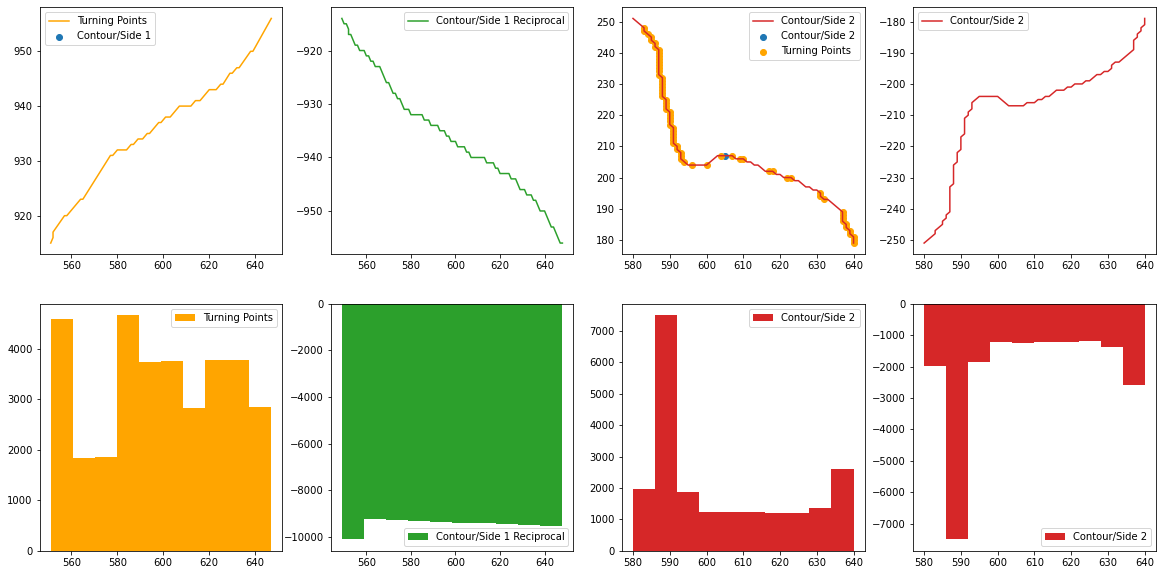

In [79]:
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y))
dy = np.gradient(np.array(cont_1_y),np.array(cont_1_x))
zero_crossings = np.where(np.diff(np.sign(dy)))[0]
peaks_cont_2y, _ = find_peaks(np.array(cont_2_y))
dy2 = np.gradient(np.array(cont_2_y),np.array(cont_2_x))
zero_crossings2 = np.where(np.diff(np.sign(dy2)))[0]
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
# plt.plot(np.array(cont_1_x),np.array(cont_1_y), color = 'tab:green', label = "Contour/Side 1")
# plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.plot(np.array(cont_1_x)[zero_crossings], np.array(cont_1_y)[zero_crossings],label="Turning Points", color="orange")
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y)[zero_crossings])
plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.legend()
plt.subplot(2,4,2)
plt.plot(np.array(cont_1_x),np.array(cont_1_y)*-1, color = 'tab:green', label = "Contour/Side 1 Reciprocal")
plt.legend()
plt.subplot(2,4,3)
plt.plot(cont_2_x,cont_2_y, color = 'tab:red',label = "Contour/Side 2")
plt.scatter(np.array(cont_2_x)[peaks_cont_2y],np.array(cont_2_y)[peaks_cont_2y], color = 'tab:blue', label = "Contour/Side 2")
plt.scatter(np.array(cont_2_x)[zero_crossings2], np.array(cont_2_y)[zero_crossings2],label="Turning Points", color="orange")
plt.legend()
plt.subplot(2,4,4)
plt.plot(np.array(cont_2_x),np.array(cont_2_y)*-1, color = 'tab:red',label = "Contour/Side 2")
plt.legend()

# HISTOGRAMS
plt.subplot(2,4,5)
plt.hist(x = np.array(cont_1_x)[zero_crossings], weights = np.array(cont_1_y)[zero_crossings], label="Turning Points", color="orange")
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y)[zero_crossings])
# plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.legend()
plt.subplot(2,4,6)
plt.hist(x = np.array(cont_1_x),weights = np.array(cont_1_y)*-1, color = 'tab:green', label = "Contour/Side 1 Reciprocal")
plt.legend()
plt.subplot(2,4,7)
plt.hist(x = cont_2_x,weights = cont_2_y, color = 'tab:red',label = "Contour/Side 2")
# plt.scatter(np.array(cont_2_x)[peaks_cont_2y],np.array(cont_2_y)[peaks_cont_2y], color = 'tab:blue', label = "Contour/Side 2")
# plt.scatter(np.array(cont_2_x)[zero_crossings2], np.array(cont_2_y)[zero_crossings2],label="Turning Points", color="orange")
plt.legend()
plt.subplot(2,4,8)
plt.hist(x = np.array(cont_2_x),weights = np.array(cont_2_y)*-1, color = 'tab:red',label = "Contour/Side 2")
plt.legend()

plt.show()

c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\seaborn\distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\seaborn\distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Count'>

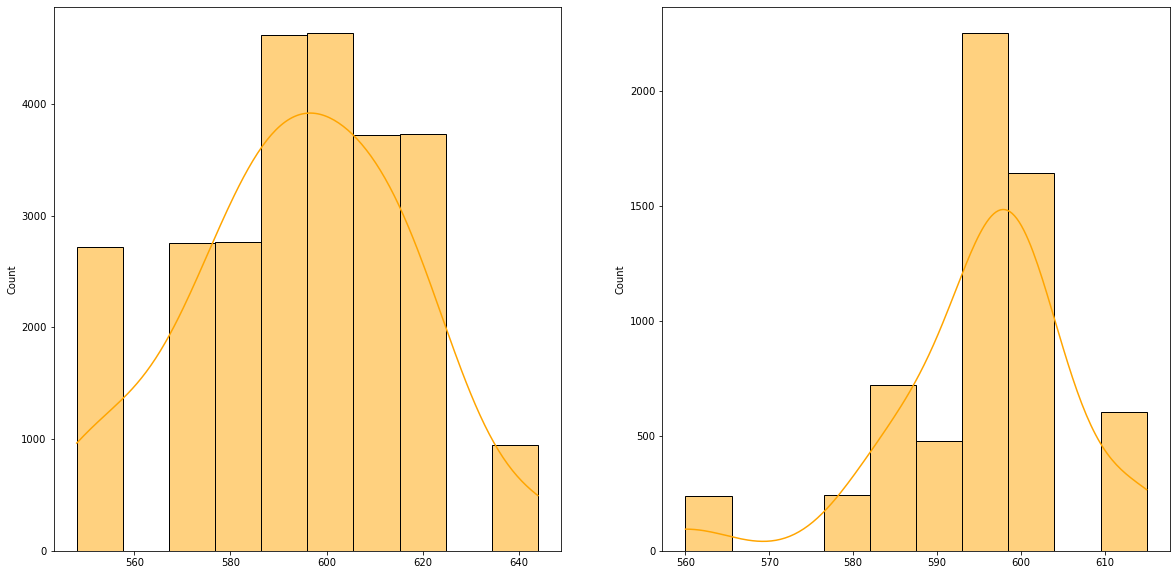

In [25]:
import seaborn as sns
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(x = np.array(cont_1_x)[zero_crossings], weights = np.array(cont_1_y)[zero_crossings], label="Turning Points", color="orange",kde = True)
plt.subplot(1,2,2)
sns.histplot(x = np.array(cont_2_x)[zero_crossings], weights = np.array(cont_2_y)[zero_crossings],label="Turning Points", color="orange", kde = True )

## Attempt Gaussian Mixture Modelling

In [26]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Example data
data = np.concatenate([np.array(cont_2_x)[zero_crossings], np.array(cont_2_y)[zero_crossings]])

# Fit a Gaussian Mixture Model with two components
gmm = GaussianMixture(n_components=2).fit(data.reshape(-1, 1))

# Predict component membership for each data point
labels = gmm.predict(data.reshape(-1, 1))

# Check how many unique components there are
num_components = len(np.unique(labels))
print("Number of components:", num_components)

Number of components: 2


# Matrix Algebra


Mean contour method:
- generate training dataset this way as well


Dot product method looking at one side and then looking at the peaks where it indicates the direction towards the back...


Light weight NN method 